## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Importing the dataset

In [3]:
df = pd.read_csv('Weather Training Data.csv')

## Data Cleaning and Processing

In [5]:
df.shape

(99516, 23)

In [7]:
df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [9]:
df.tail()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
99511,Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0
99515,Row101820,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [13]:
# Checking the null values
df.isnull().sum()

row ID               0
Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [15]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [17]:
df.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [19]:
df['Location'].dtypes

dtype('O')

In [21]:
[feature for feature in df.columns if df[feature].dtypes != 'O']

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

In [23]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [25]:
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

In [27]:
[feature for feature in df.columns if feature not in numerical_feature]

['row ID', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [29]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

In [31]:
categorical_feature

['row ID', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [33]:
len(df)

99516

In [35]:
df.isnull().sum()*100/len(df)

row ID            0.000000
Location          0.000000
MinTemp           0.445155
MaxTemp           0.231119
Rainfall          0.983761
Evaporation      42.737851
Sunshine         47.547128
WindGustDir       6.552715
WindGustSpeed     6.511516
WindDir9am        7.040074
WindDir3pm        2.660879
WindSpeed9am      0.939547
WindSpeed3pm      1.843925
Humidity9am       1.238997
Humidity3pm       2.518188
Pressure9am       9.795410
Pressure3pm       9.783351
Cloud9am         37.754733
Cloud3pm         40.196551
Temp9am           0.616986
Temp3pm           1.913260
RainToday         0.983761
RainTomorrow      0.000000
dtype: float64

In [37]:
df[['row ID', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]

,row ID,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Row0,Albury,W,W,WNW,No
1,Row1,Albury,WNW,NNW,WSW,No
2,Row2,Albury,W,ENE,NW,No
3,Row3,Albury,WNW,W,W,No
4,Row4,Albury,W,SSE,W,No
...,...,...,...,...,...,...
99511,Row101816,Uluru,ESE,SE,E,No
99512,Row101817,Uluru,E,ESE,E,No
99513,Row101818,Uluru,E,SE,ENE,No
99514,Row101819,Uluru,NNW,SE,N,No


In [39]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [41]:
len(df['Location'].unique())

49

In [43]:
df['Location'].value_counts()

Location
Canberra            2393
Sydney              2361
Perth               2262
Hobart              2239
Darwin              2217
Brisbane            2202
Adelaide            2178
PerthAirport        2167
Albury              2142
MountGambier        2140
MelbourneAirport    2139
Mildura             2124
Ballarat            2122
AliceSprings        2119
Watsonia            2113
Portland            2113
Bendigo             2110
Nuriootpa           2110
Townsville          2106
Cairns              2101
SydneyAirport       2100
Tuggeranong         2099
Newcastle           2096
Sale                2093
Wollongong          2090
Cobar               2090
Launceston          2072
WaggaWagga          2068
Dartmoor            2067
CoffsHarbour        2066
Witchcliffe         2060
Richmond            2060
Penrith             2059
GoldCoast           2057
Woomera             2053
Albany              2051
BadgerysCreek       2041
NorfolkIsland       2038
SalmonGums          2031
NorahHead       

In [45]:
df['WindGustDir'].value_counts()

WindGustDir
W      6843
SE     6475
E      6341
SSE    6329
N      6323
SW     6233
S      6228
WSW    6164
SSW    6023
WNW    5664
NW     5599
ENE    5558
ESE    5101
NE     4956
NNW    4589
NNE    4569
Name: count, dtype: int64

In [47]:
df['WindDir9am'].value_counts()

WindDir9am
N      8052
E      6333
SE     6311
SSE    6214
S      5995
NW     5975
SW     5808
W      5790
NNE    5600
NNW    5457
ENE    5357
NE     5323
ESE    5312
SSW    5147
WNW    5041
WSW    4795
Name: count, dtype: int64

In [49]:
df['WindDir3pm'].value_counts()

WindDir3pm
SE     7410
W      6897
S      6653
WSW    6640
SW     6451
SSE    6386
N      6065
WNW    6063
NW     5917
ESE    5850
E      5839
NE     5710
SSW    5576
NNW    5437
ENE    5413
NNE    4561
Name: count, dtype: int64

In [51]:
df['RainToday'].value_counts()

RainToday
No     76481
Yes    22056
Name: count, dtype: int64

## Read Original Weather Data

In [53]:
weather_df = pd.read_csv("Weather Training Data.csv")
weather_df.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


### Pre-processing of Original Weather Data

In [55]:
updated_weather_df = weather_df
updated_weather_df = updated_weather_df.drop(['row ID'], axis = 1)
updated_weather_df['MinTemp']=updated_weather_df['MinTemp'].fillna(updated_weather_df['MinTemp'].mean())
updated_weather_df['MaxTemp']=updated_weather_df['MaxTemp'].fillna(updated_weather_df['MaxTemp'].mean())
updated_weather_df['Rainfall']=updated_weather_df['Rainfall'].fillna(updated_weather_df['Rainfall'].mean())
updated_weather_df['Evaporation']=updated_weather_df['Evaporation'].fillna(updated_weather_df['Evaporation'].mean())
updated_weather_df['Sunshine']=updated_weather_df['Sunshine'].fillna(updated_weather_df['Sunshine'].mean())
updated_weather_df['WindGustSpeed']=updated_weather_df['WindGustSpeed'].fillna(updated_weather_df['WindGustSpeed'].mean())
updated_weather_df['WindSpeed9am']=updated_weather_df['WindSpeed9am'].fillna(updated_weather_df['WindSpeed9am'].mean())
updated_weather_df['WindSpeed3pm']=updated_weather_df['WindSpeed3pm'].fillna(updated_weather_df['WindSpeed3pm'].mean())
updated_weather_df['Humidity9am']=updated_weather_df['Humidity9am'].fillna(updated_weather_df['Humidity9am'].mean())
updated_weather_df['Humidity3pm']=updated_weather_df['Humidity3pm'].fillna(updated_weather_df['Humidity3pm'].mean())
updated_weather_df['Pressure9am']=updated_weather_df['Pressure9am'].fillna(updated_weather_df['Pressure9am'].mean())
updated_weather_df['Pressure3pm']=updated_weather_df['Pressure3pm'].fillna(updated_weather_df['Pressure3pm'].mean())
updated_weather_df['Cloud9am']=updated_weather_df['Cloud9am'].fillna(updated_weather_df['Cloud9am'].mean())
updated_weather_df['Cloud3pm']=updated_weather_df['Cloud3pm'].fillna(updated_weather_df['Cloud3pm'].mean())
updated_weather_df['Temp9am']=updated_weather_df['Temp9am'].fillna(updated_weather_df['Temp9am'].mean())
updated_weather_df['Temp3pm']=updated_weather_df['Temp3pm'].fillna(updated_weather_df['Temp3pm'].mean())
print(updated_weather_df.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64


In [57]:
updated_weather_df['WindGustDir']=updated_weather_df['WindGustDir'].fillna(updated_weather_df['WindGustDir'].value_counts().idxmax())
updated_weather_df['WindDir9am']=updated_weather_df['WindDir9am'].fillna(updated_weather_df['WindDir9am'].value_counts().idxmax())
updated_weather_df['WindDir3pm']=updated_weather_df['WindDir3pm'].fillna(updated_weather_df['WindDir3pm'].value_counts().idxmax())
print(updated_weather_df.isnull().sum())

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        979
RainTomorrow       0
dtype: int64


In [59]:
updated_weather_df['RainToday'] = updated_weather_df['RainToday'].fillna(updated_weather_df['RainTomorrow'].shift())
print(updated_weather_df.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [61]:
updated_weather_df.loc[updated_weather_df.RainToday == "Yes", "RainToday"] = 1
updated_weather_df.loc[updated_weather_df.RainToday == "No", "RainToday"] = 0
updated_weather_df['RainToday'] = updated_weather_df['RainToday'].astype(int)
updated_weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.46132,7.61509,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.46132,7.61509,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,Albury,17.5,32.3,1.0,5.46132,7.61509,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,Albury,14.6,29.7,0.2,5.46132,7.61509,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,Albury,7.7,26.7,0.0,5.46132,7.61509,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [63]:
updated_weather_df['RainToday'].value_counts()

RainToday
0    77172
1    22344
Name: count, dtype: int64

## Data Analysis

### Feature Distribution

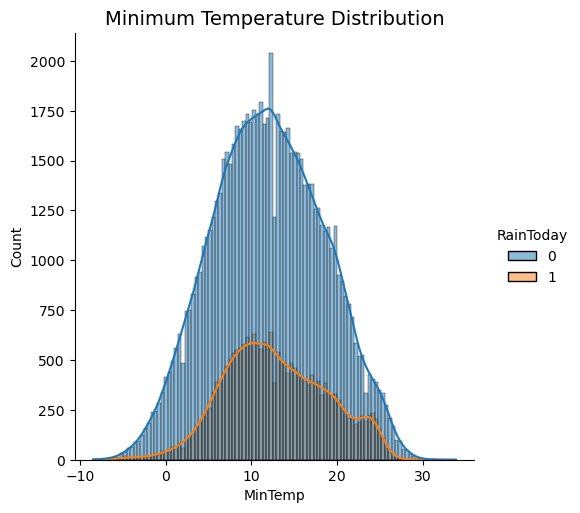

In [65]:
sns.displot(updated_weather_df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

 During the analysis it has been found that the range of minimum temperature is from -8.5
C to 33.9
C and 11
C minimum temperature has the highest frequency in the dataset.

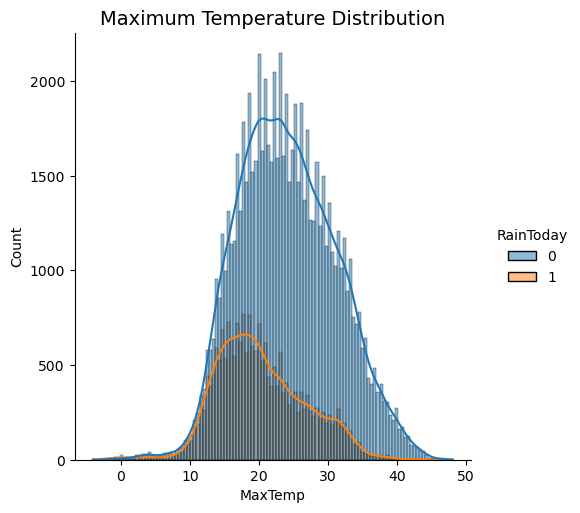

In [67]:
sns.displot(updated_weather_df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

On the other hand, the range of maximum temperature is from -4.1
C to 48.1
C and 20
C maximum temperature has the highest frequency in the dataset.

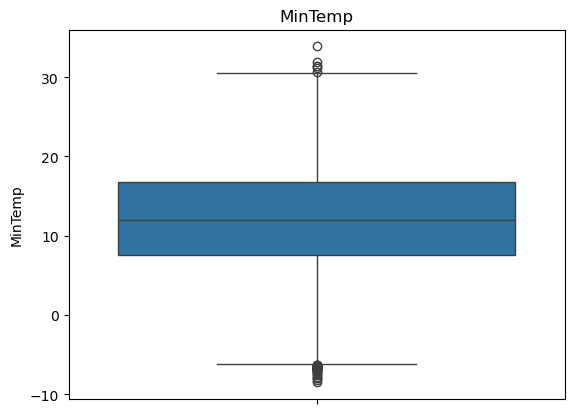

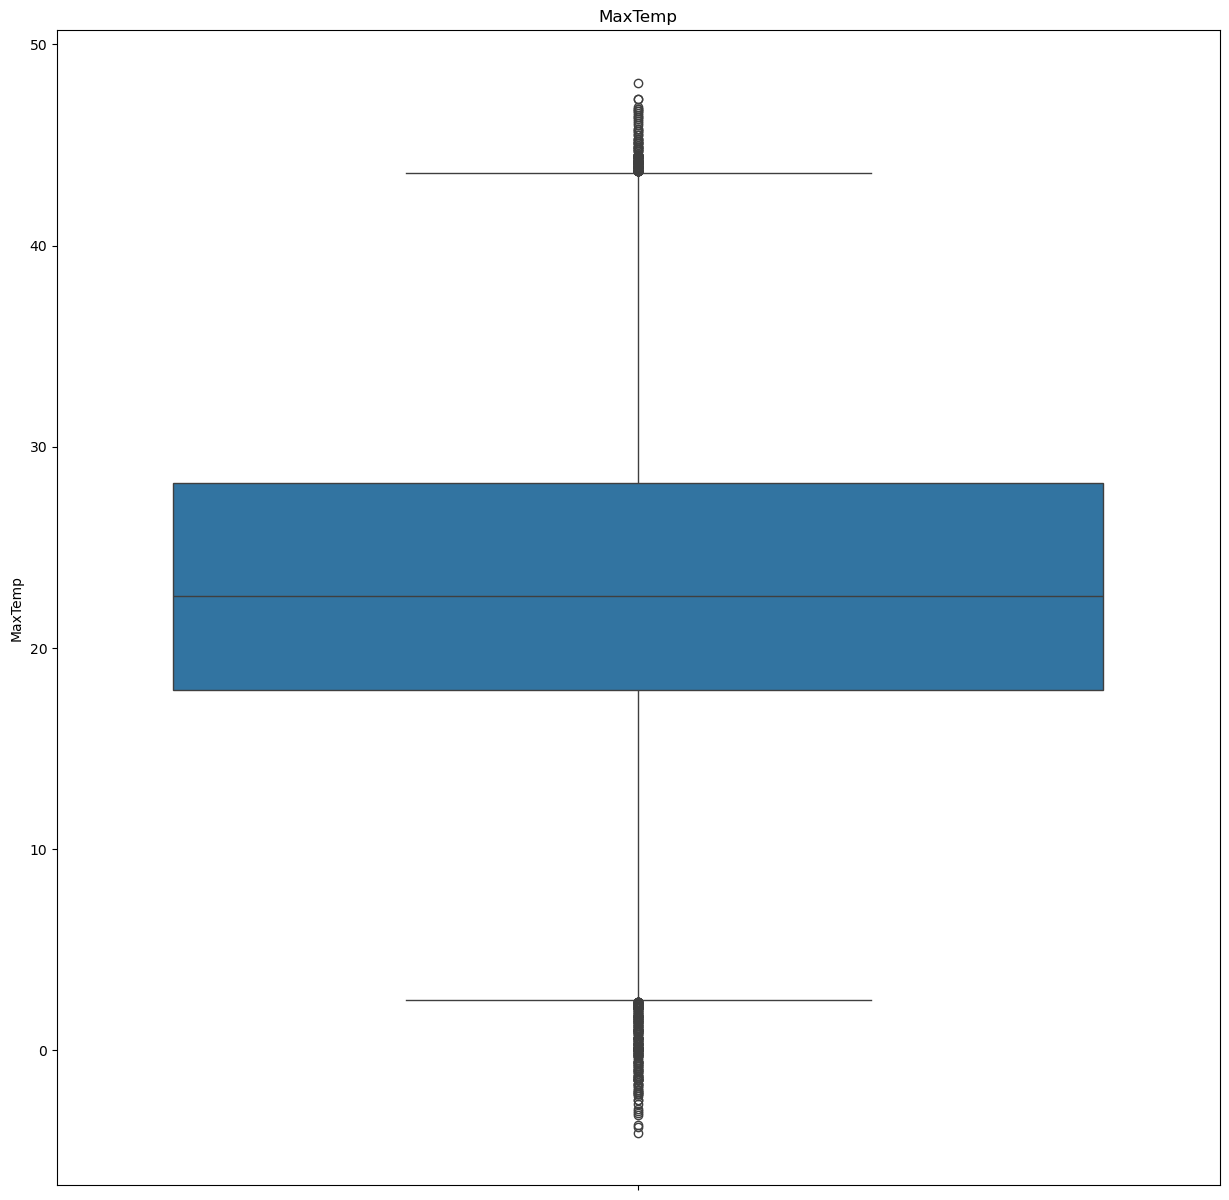

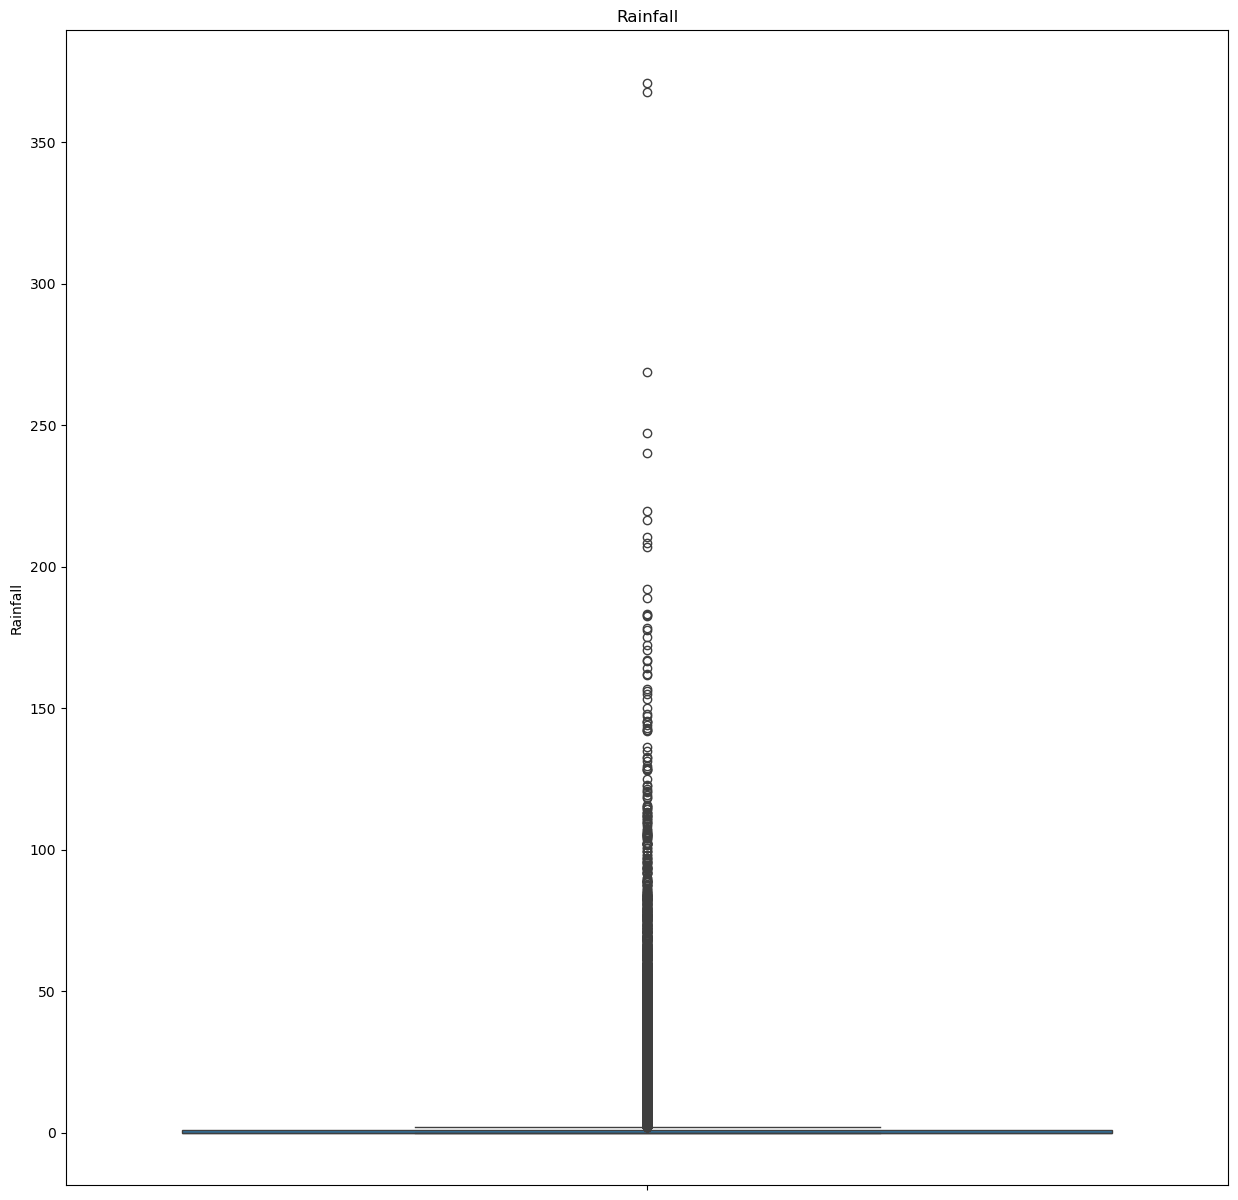

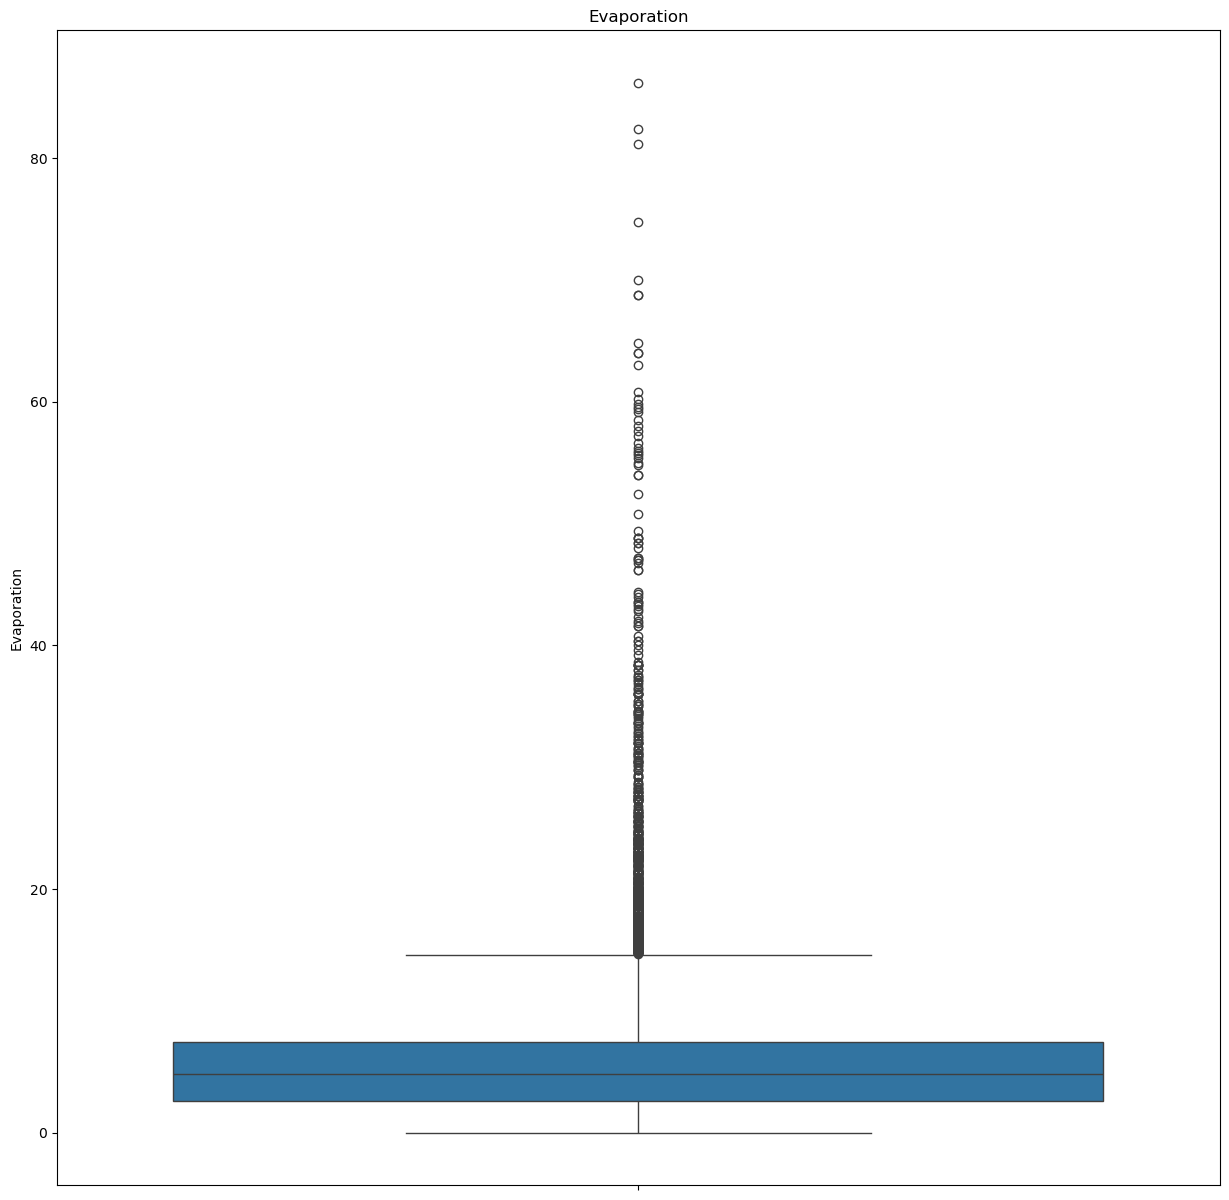

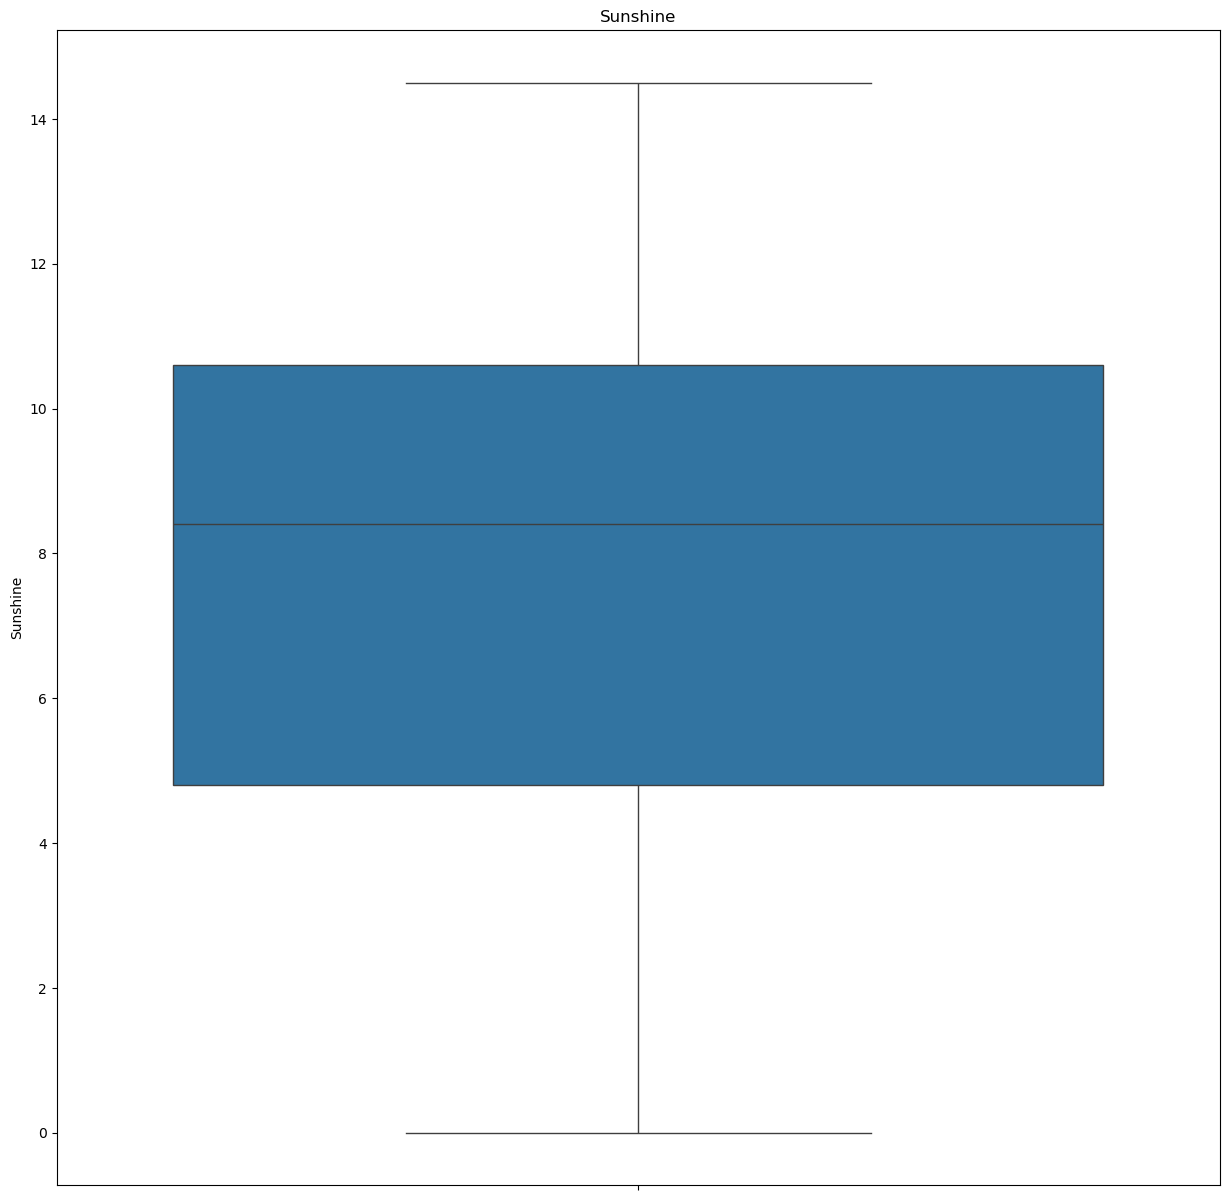

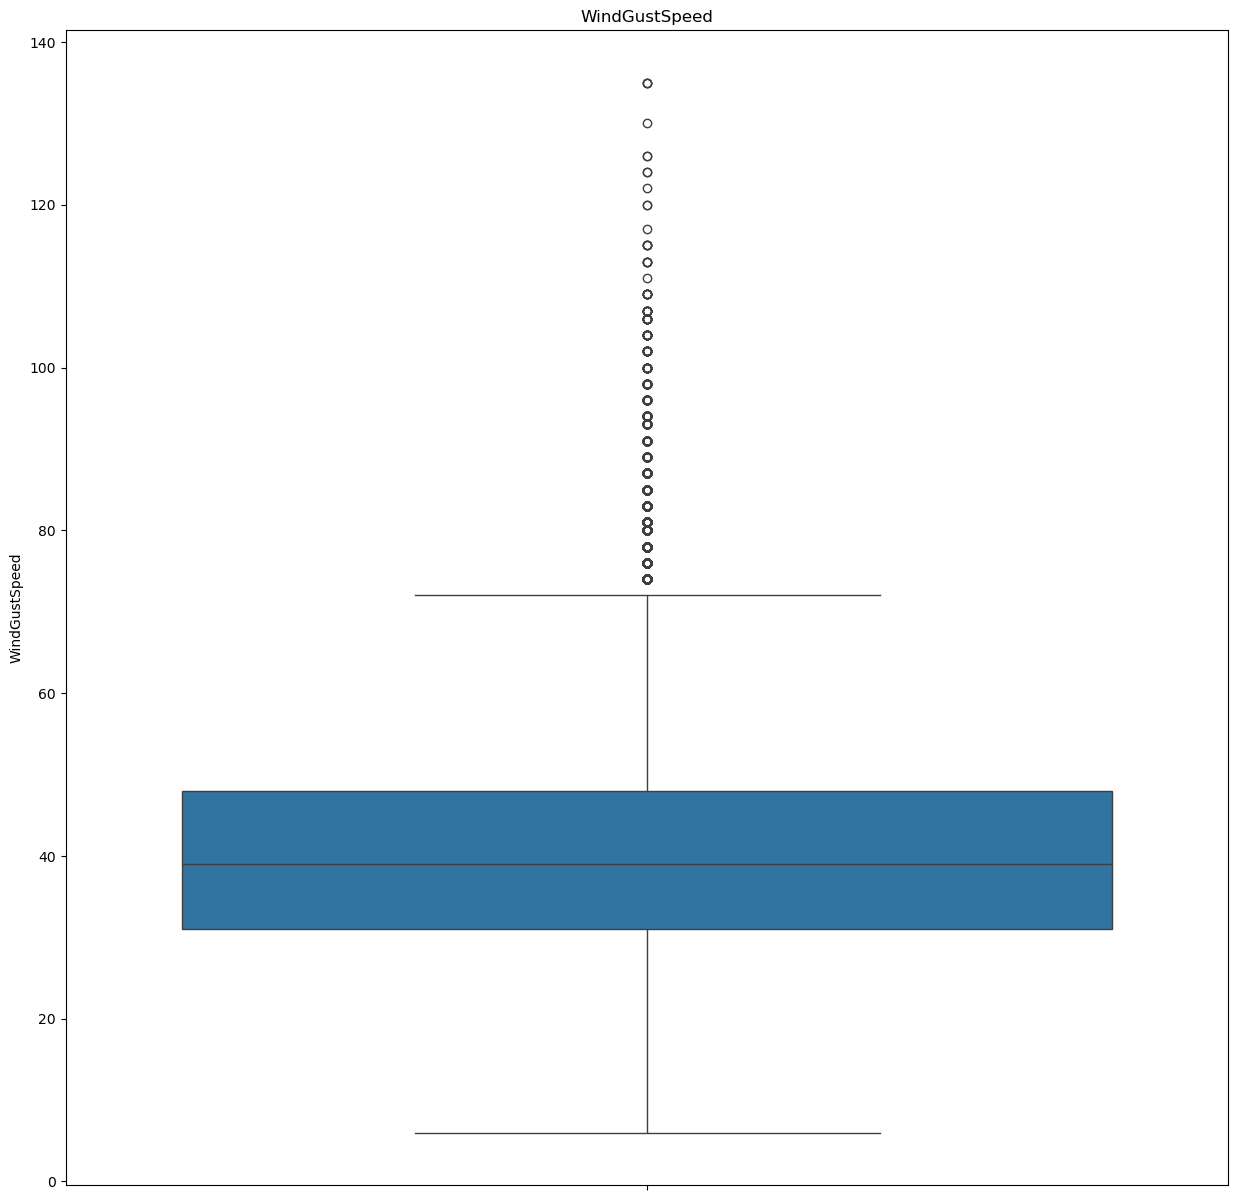

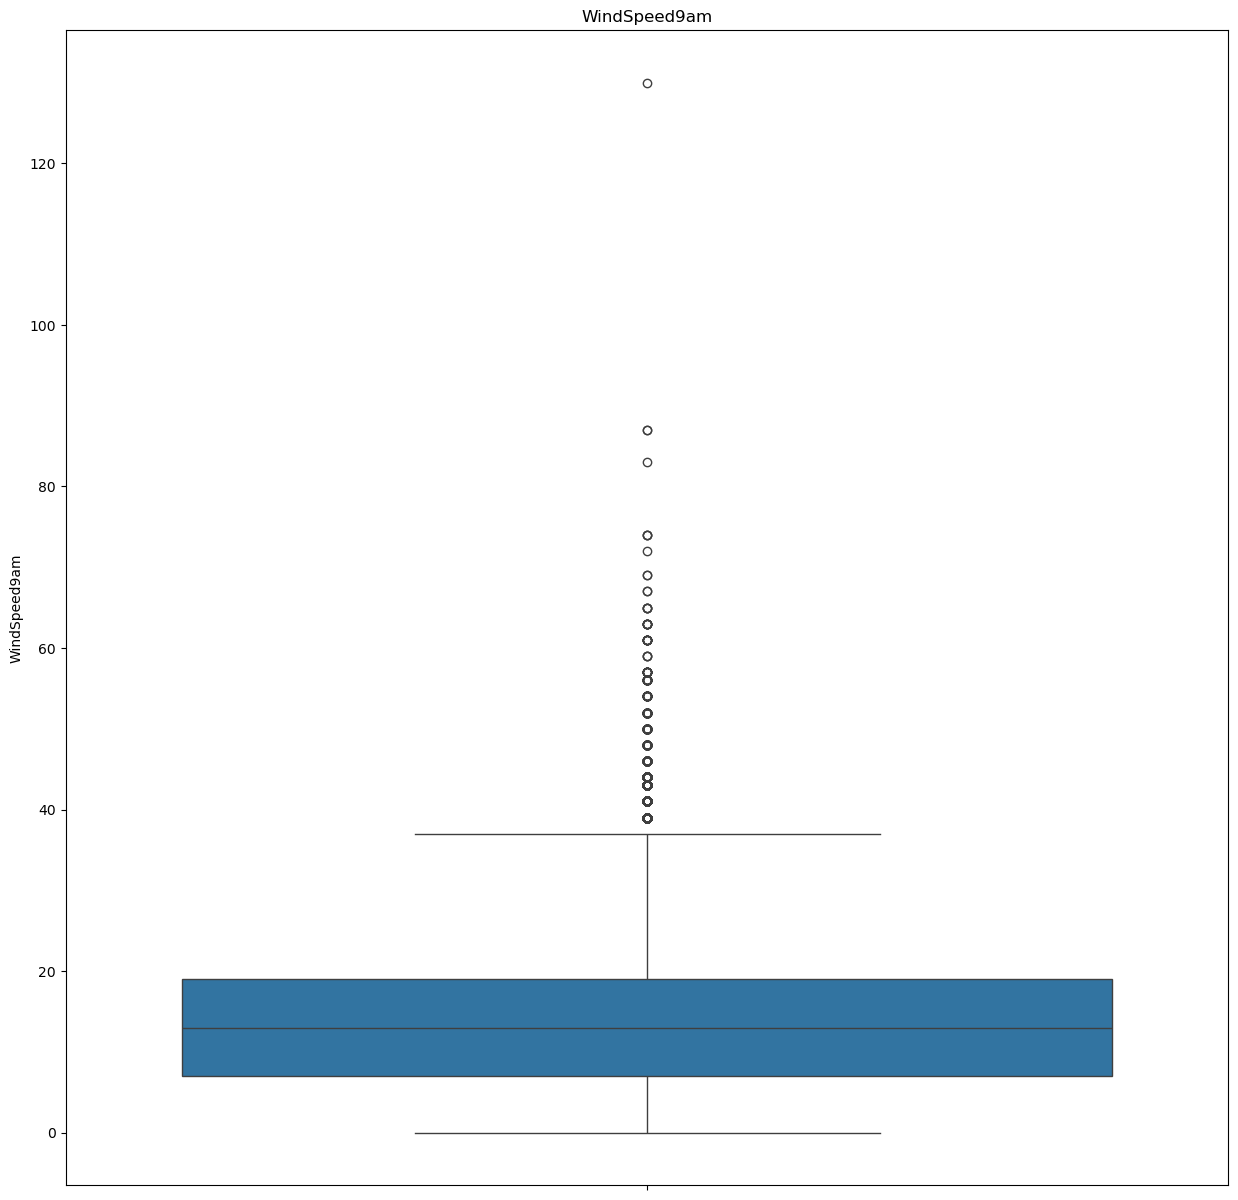

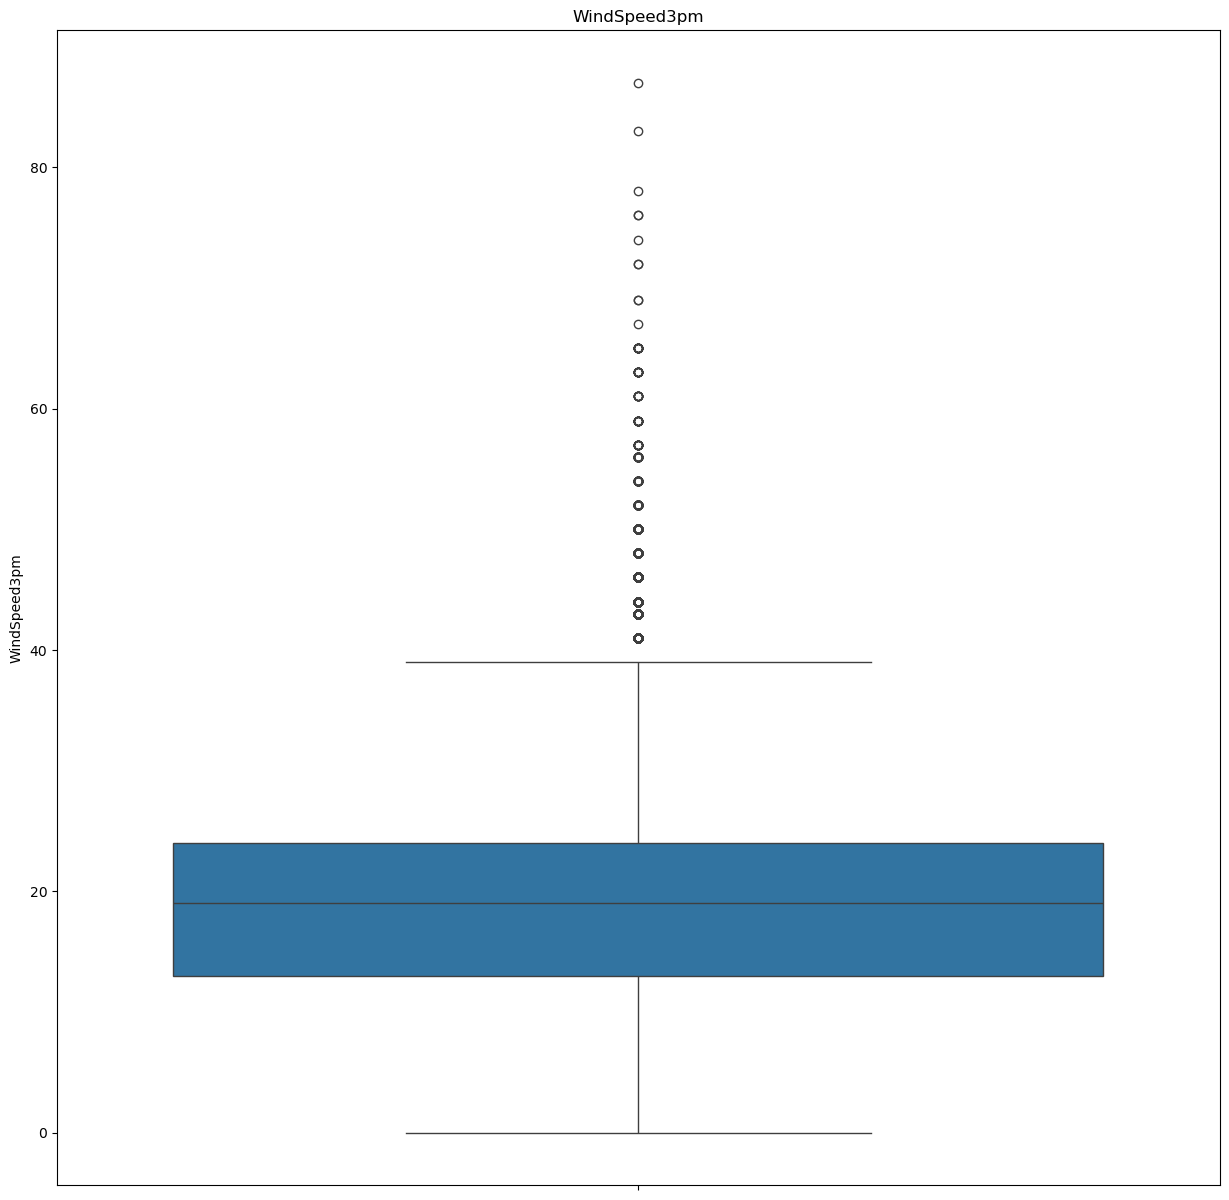

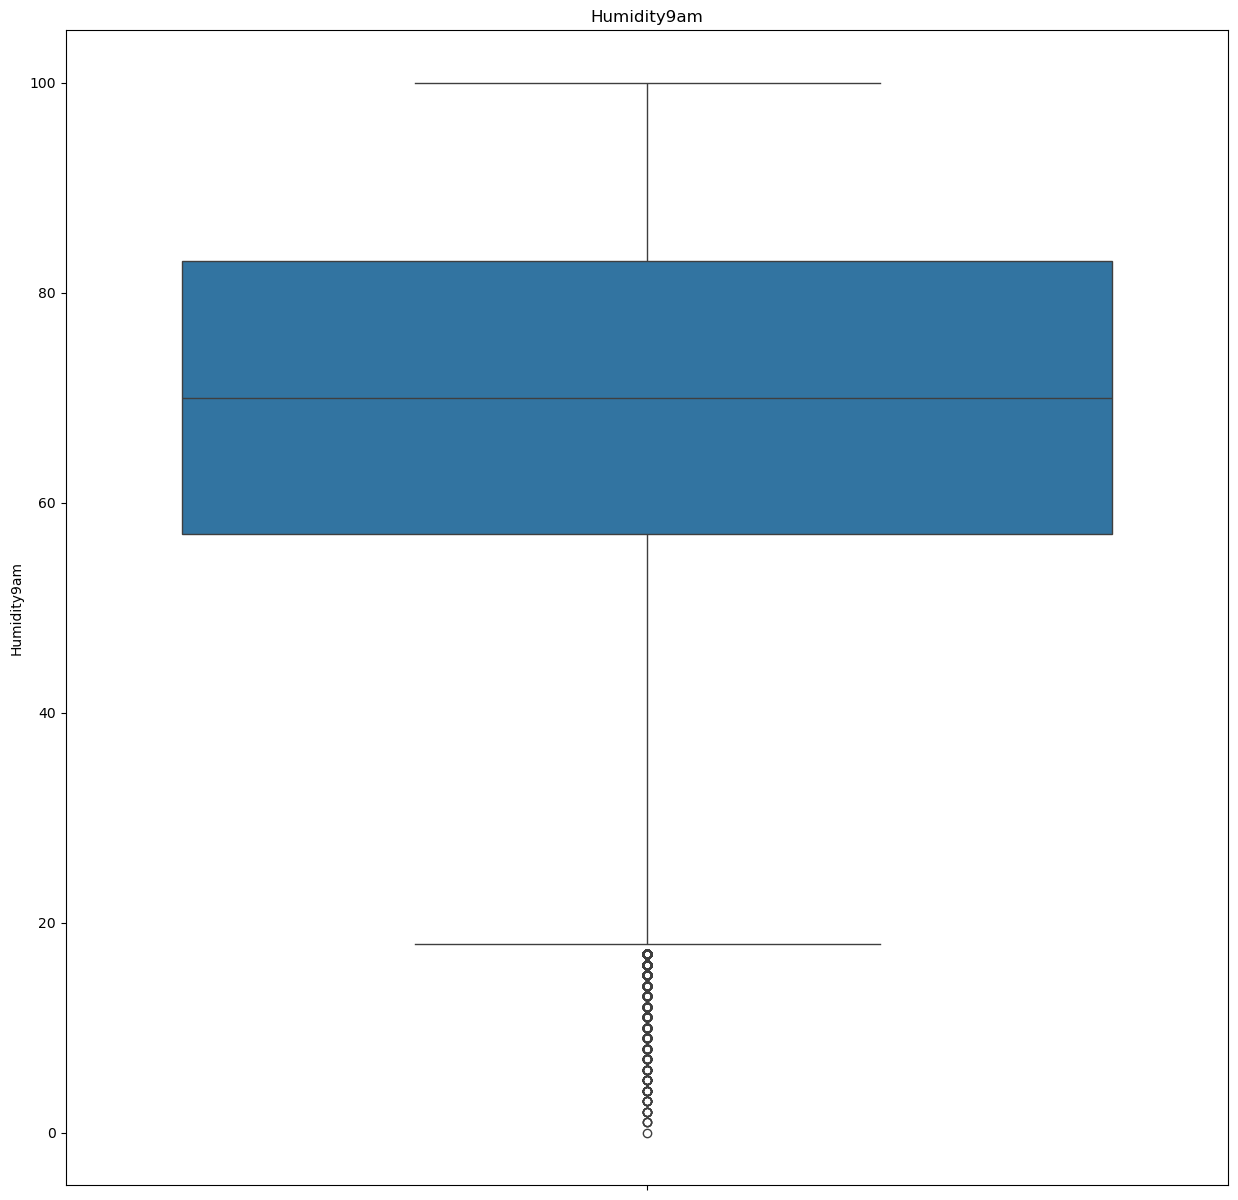

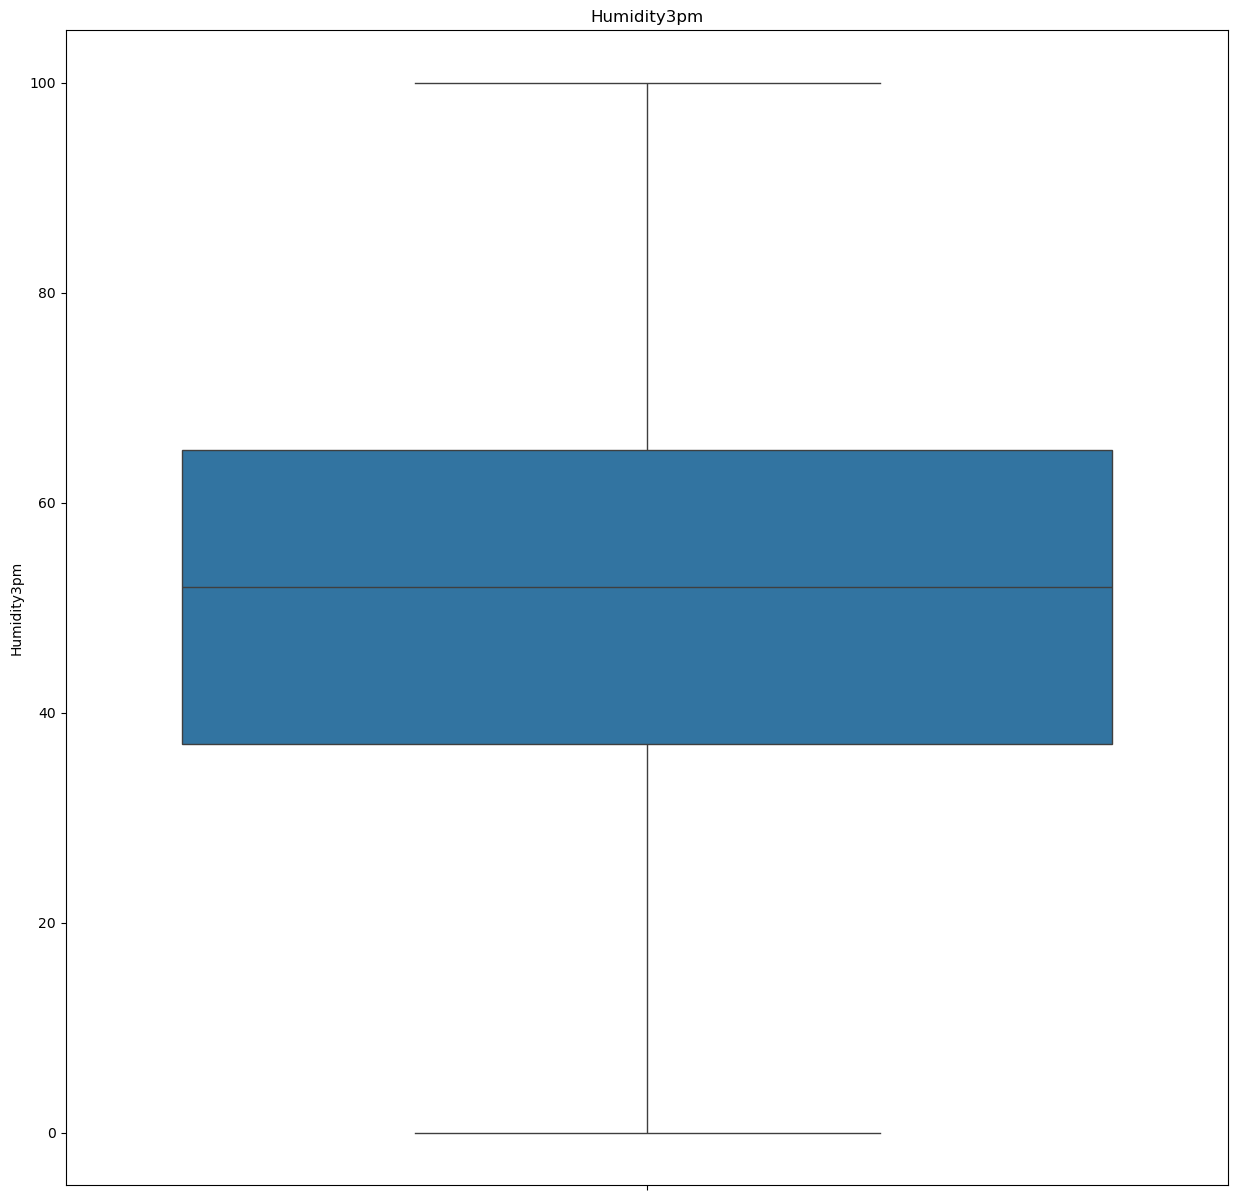

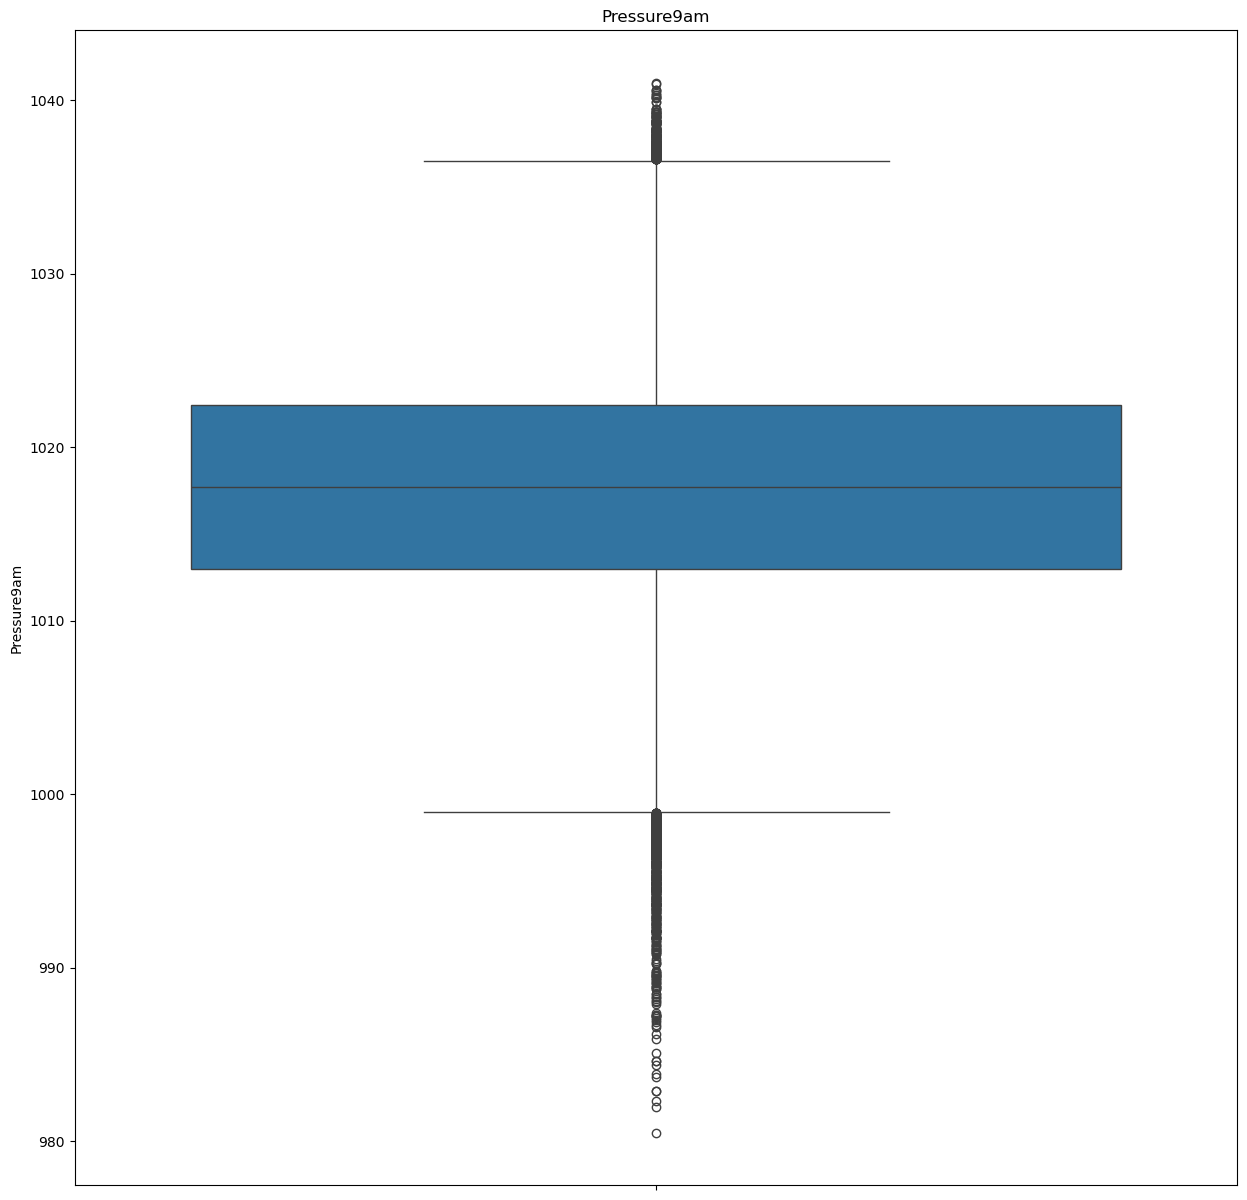

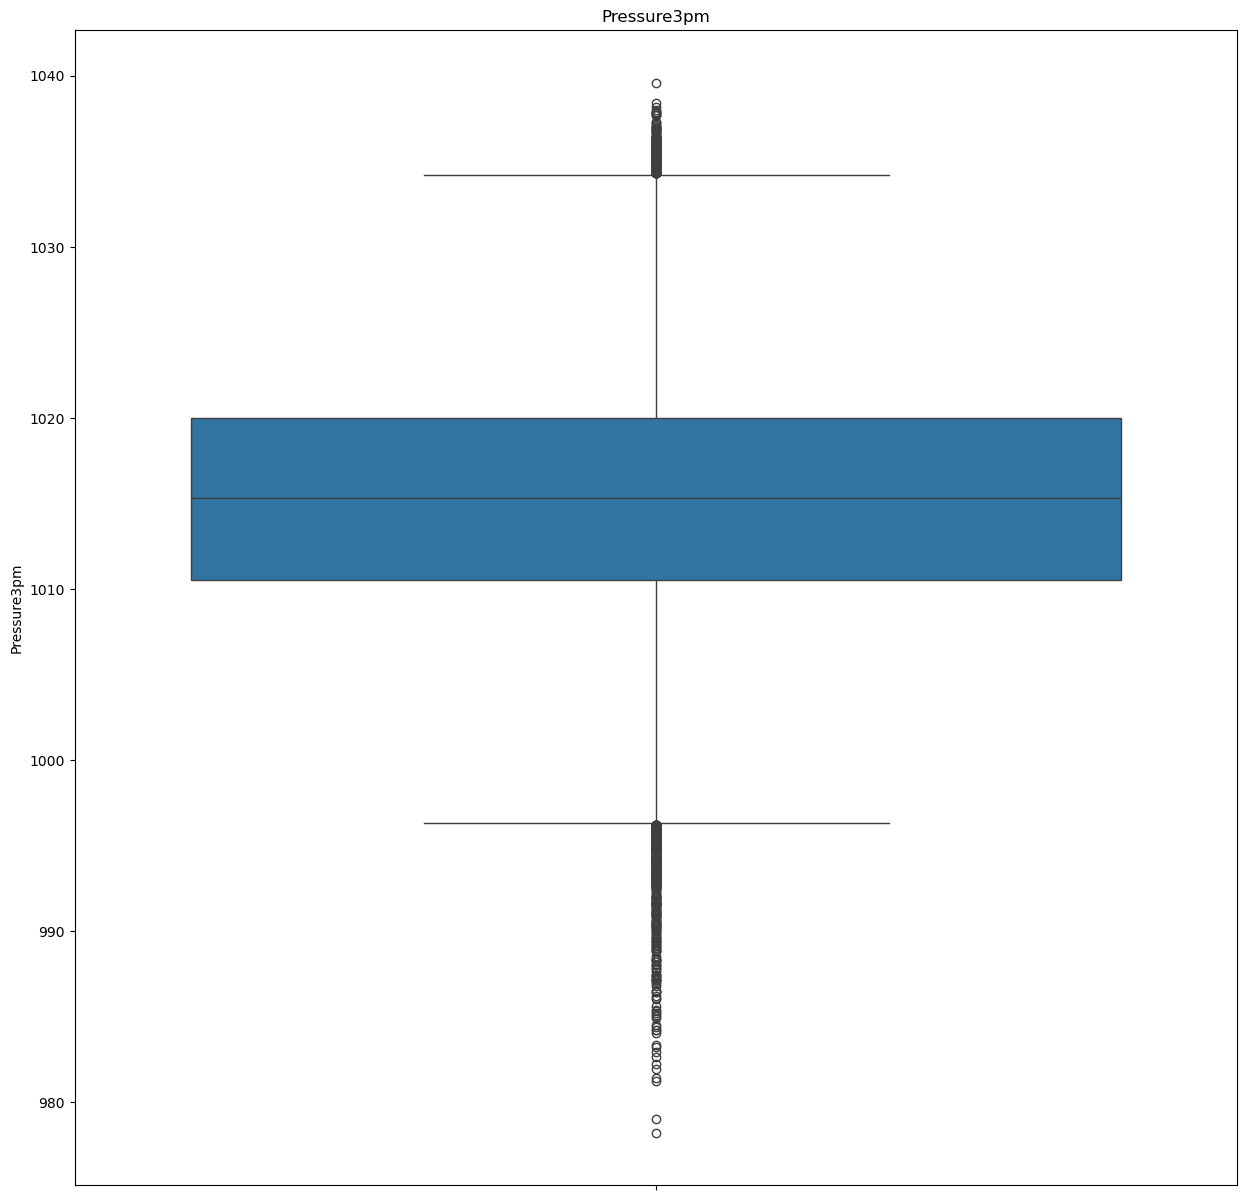

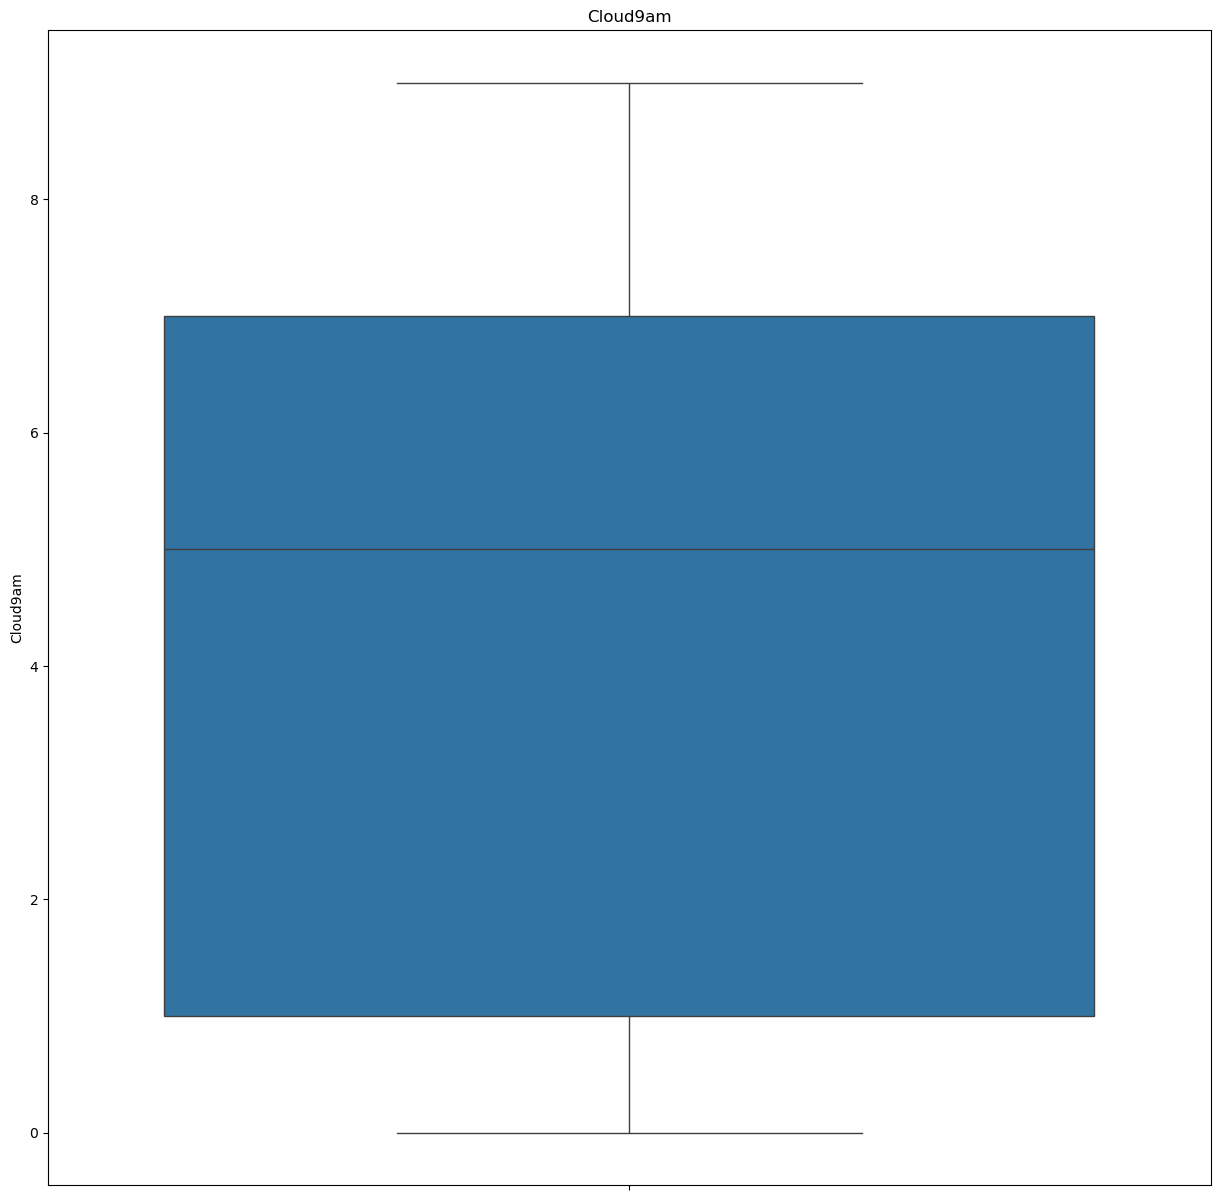

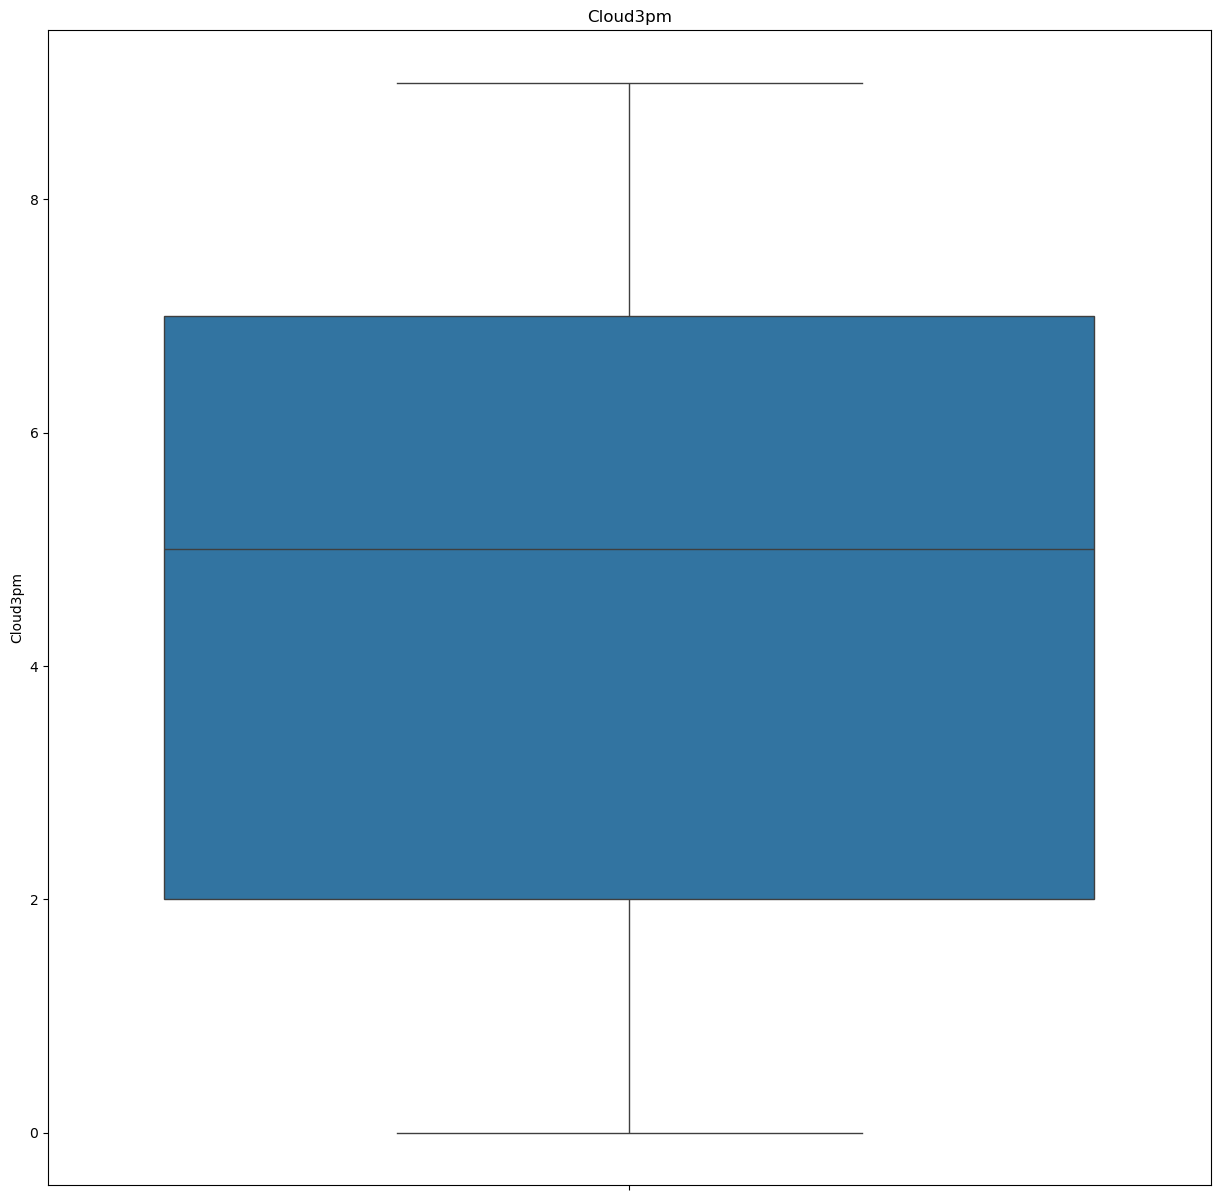

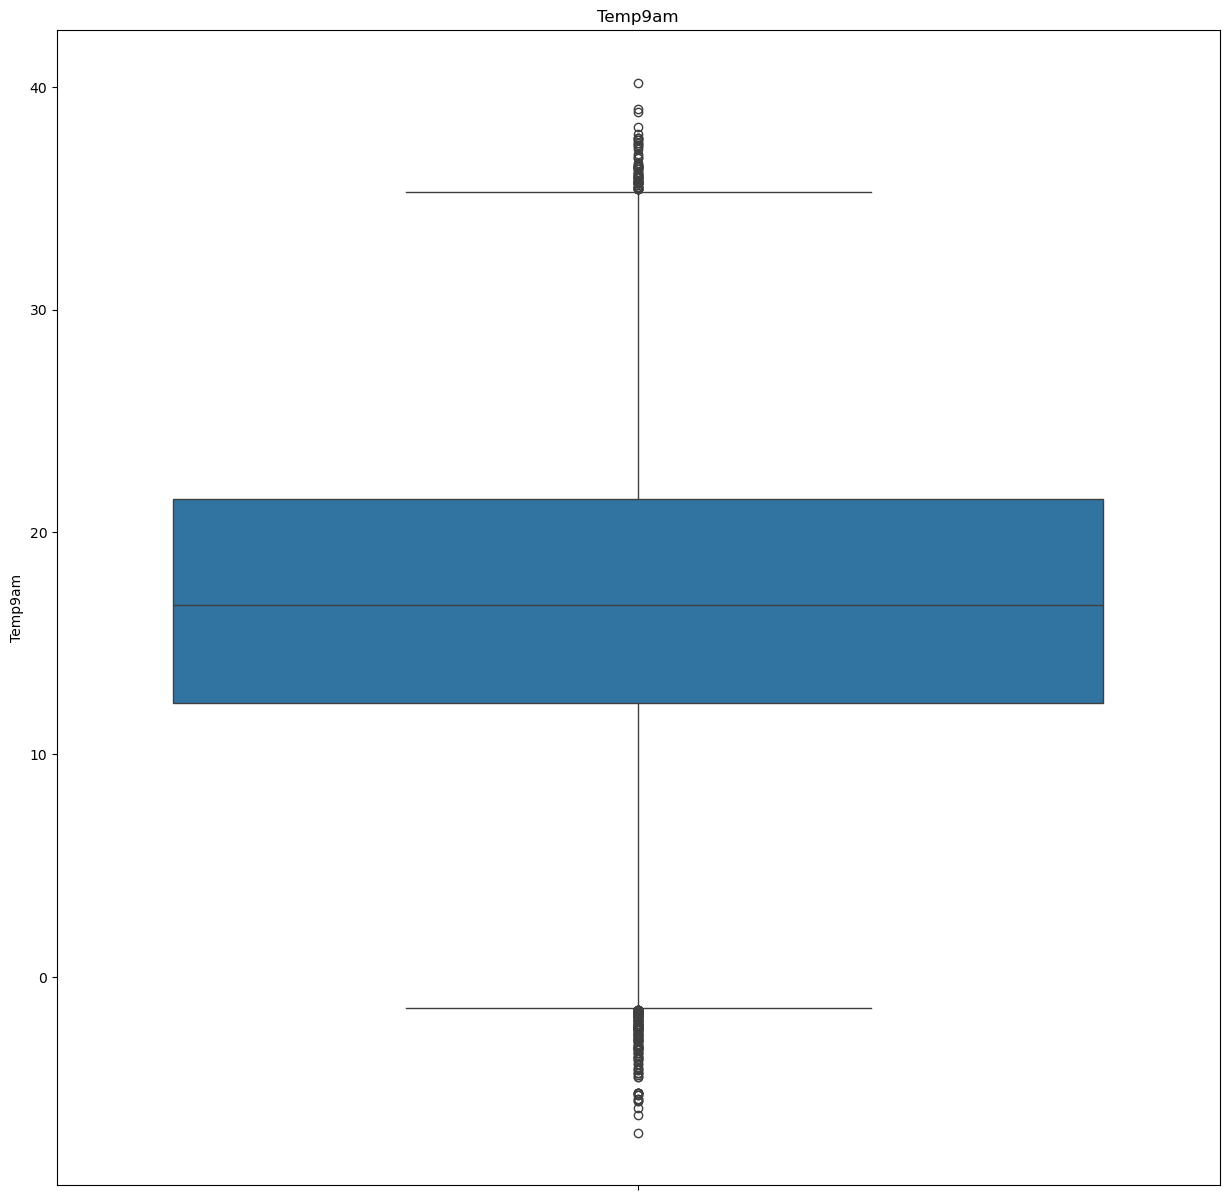

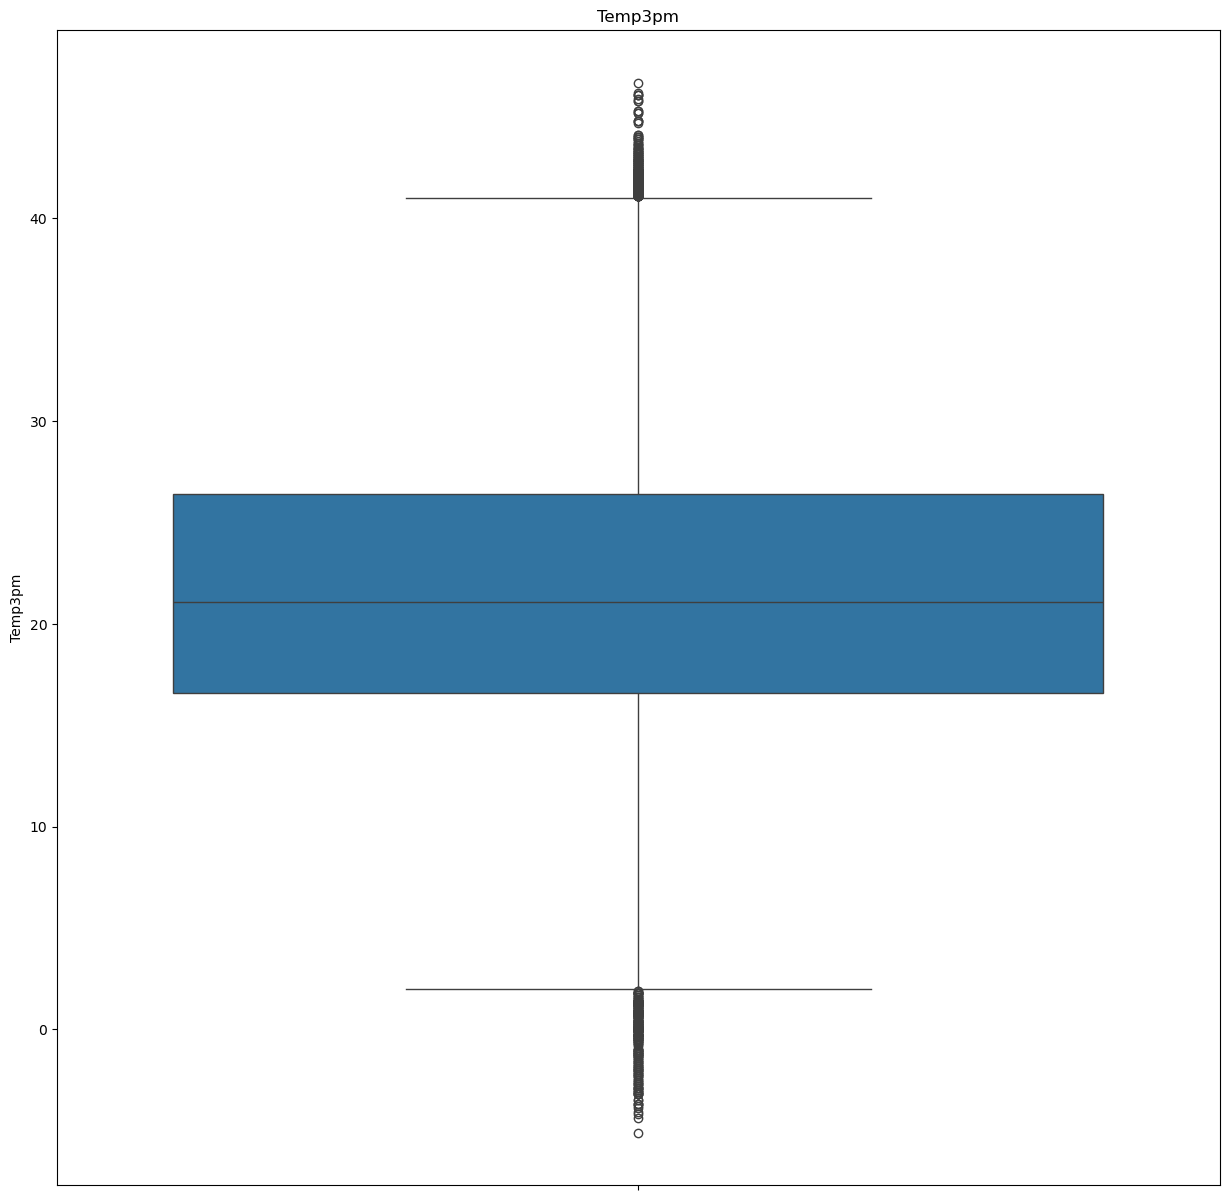

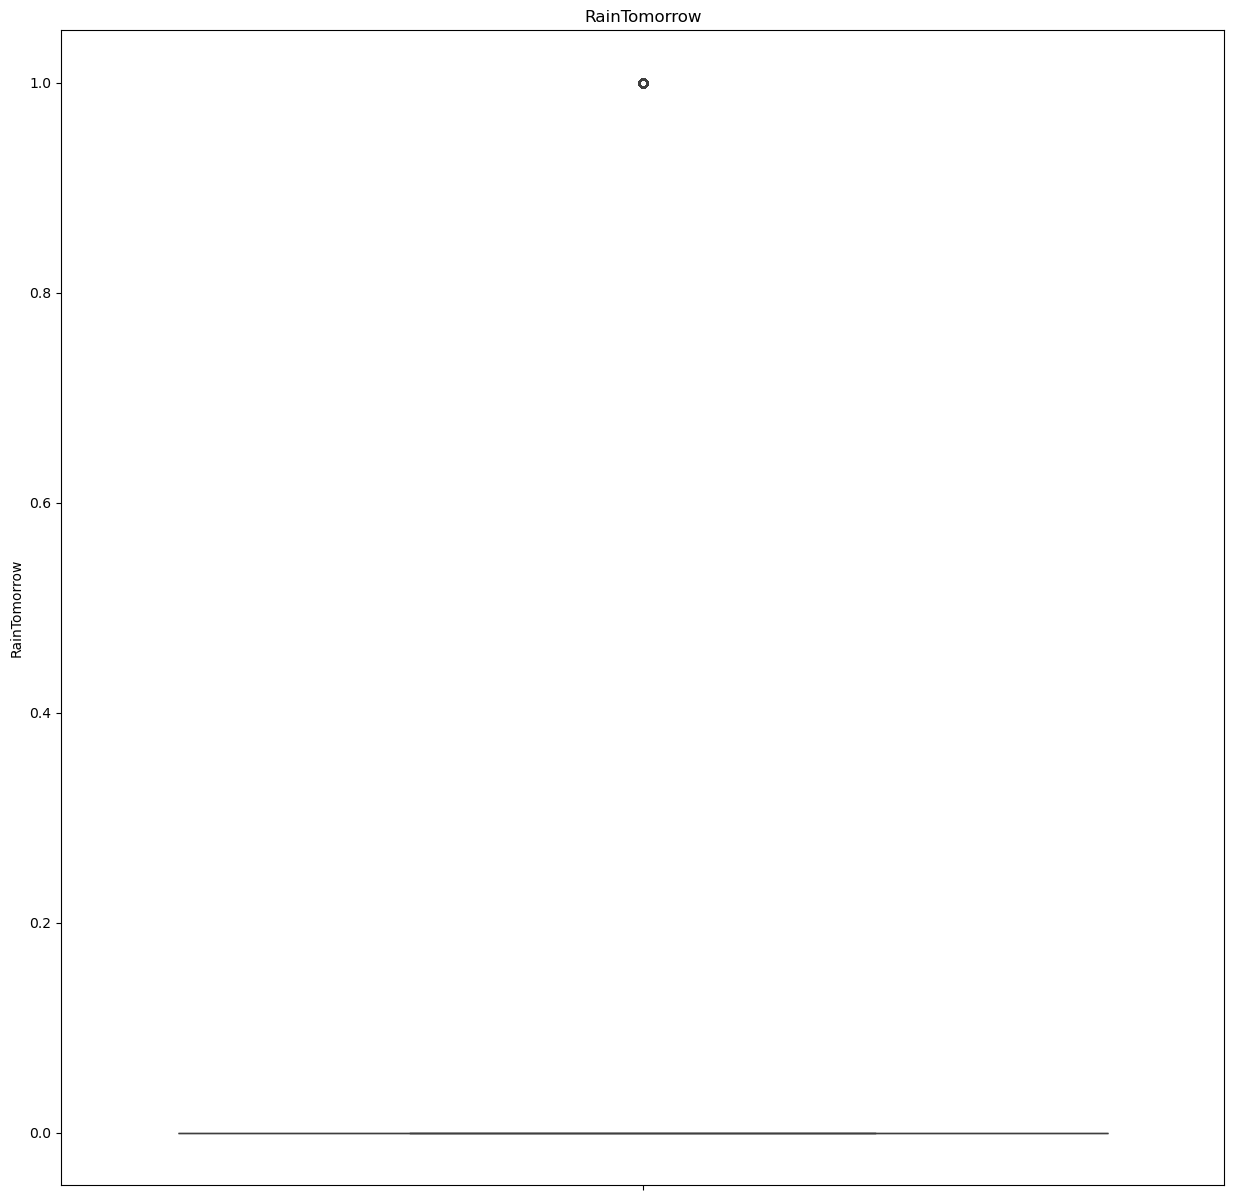

<Figure size 1500x1500 with 0 Axes>

In [69]:
for feature in numerical_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [71]:
def outliers(df, variable):
    IQR = df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_fenche = df[variable].quantile(0.25)-(IQR*1.5)
    upper_fenche = df[variable].quantile(0.75)+(IQR*1.5)
    print(lower_fenche, upper_fenche)

    df.loc[df[variable]>=upper_fenche,variable]=upper_fenche
    df.loc[df[variable]<=lower_fenche,variable]=lower_fenche

In [73]:
for feature in numerical_feature:
    outliers(df, str(feature))

-6.200000000000001 30.6
2.4499999999999975 43.65
-1.2000000000000002 2.0
-4.600000000000001 14.600000000000001
-3.8999999999999995 19.299999999999997
5.5 73.5
-11.0 37.0
-3.5 40.5
18.0 122.0
-5.0 107.0
998.9000000000001 1036.5
996.25 1034.25
-8.0 16.0
-5.5 14.5
-1.4999999999999982 35.3
1.9000000000000057 41.099999999999994
0.0 0.0


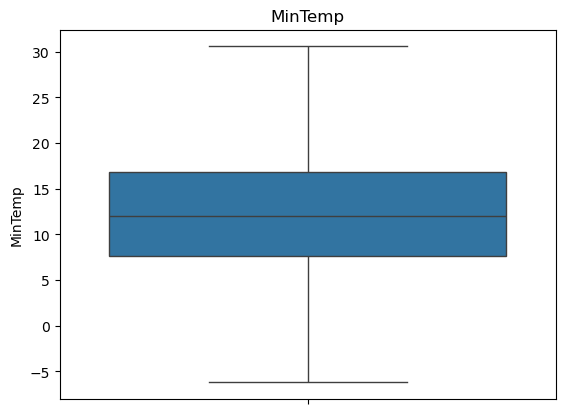

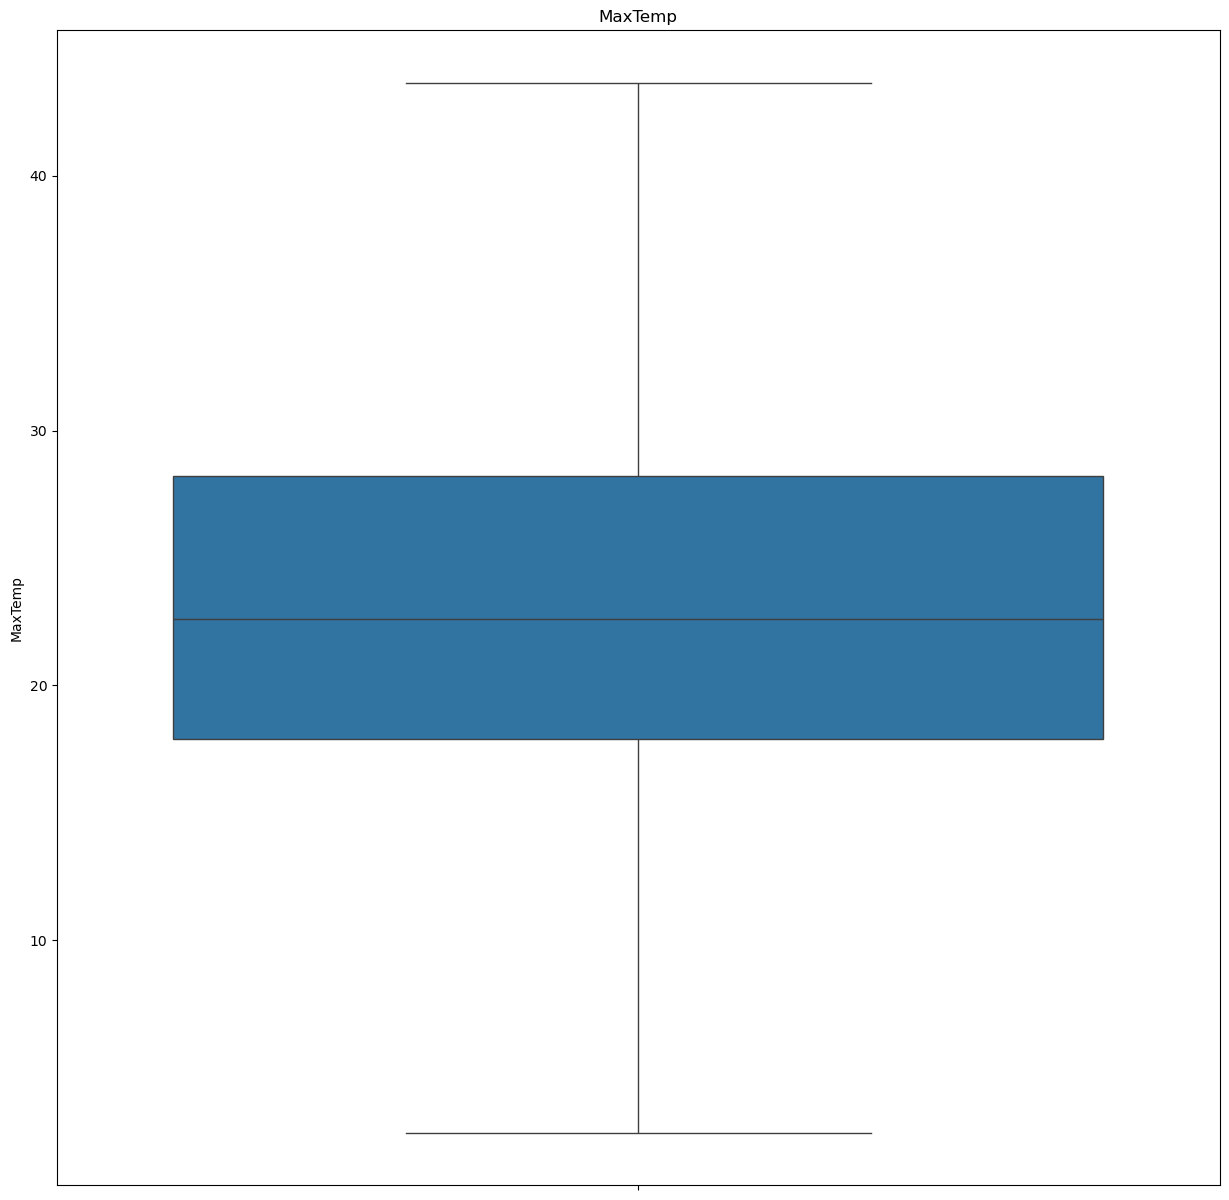

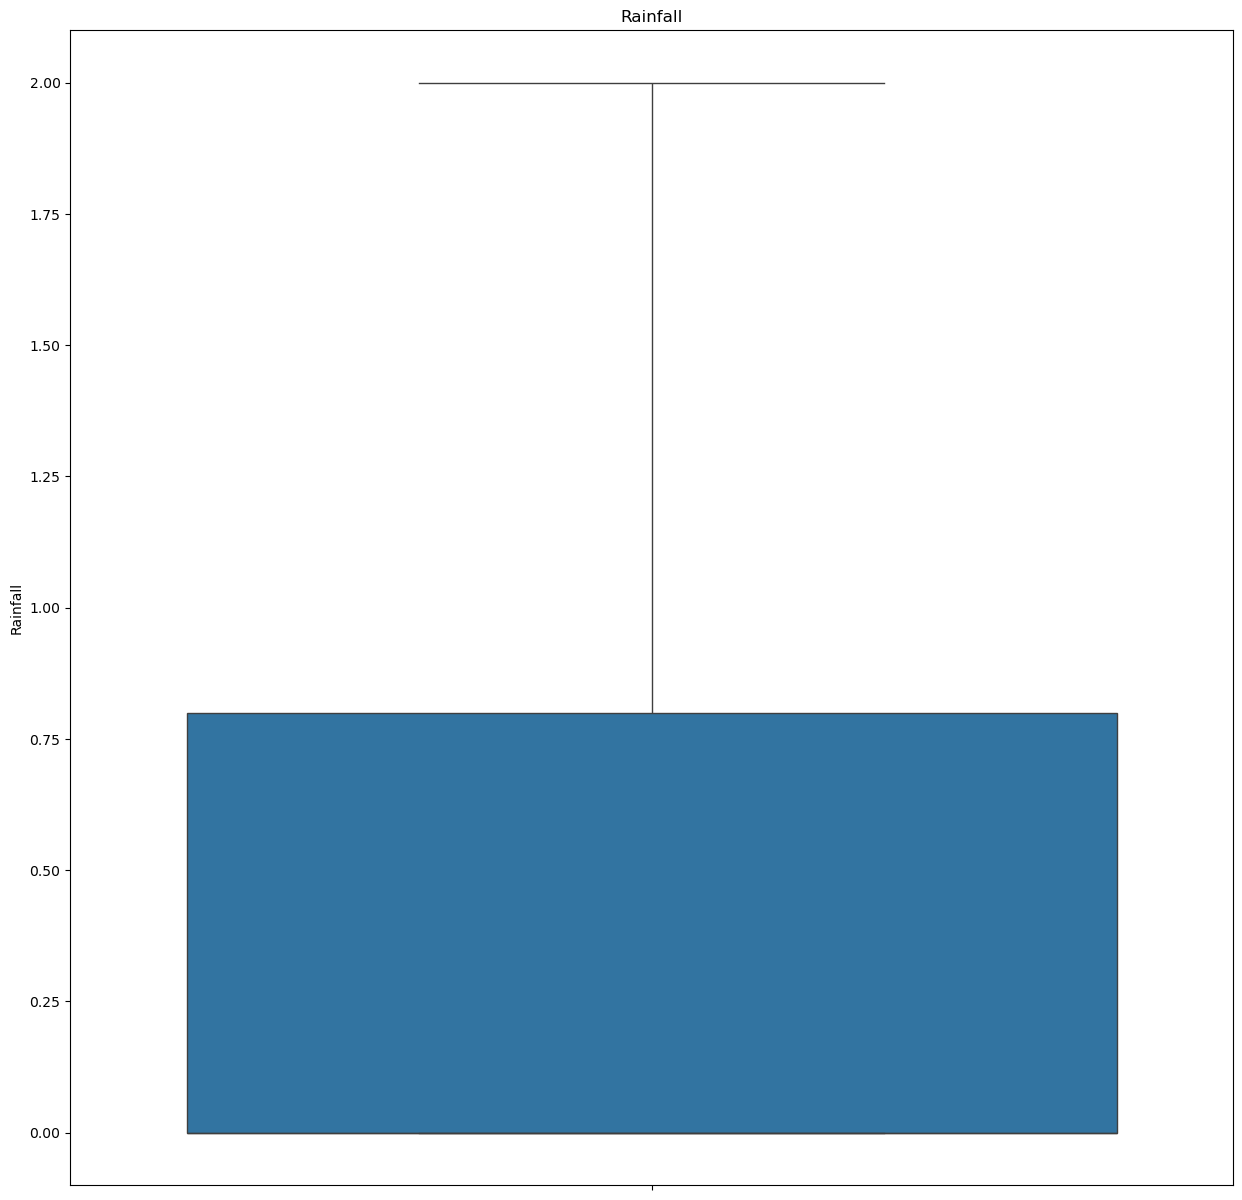

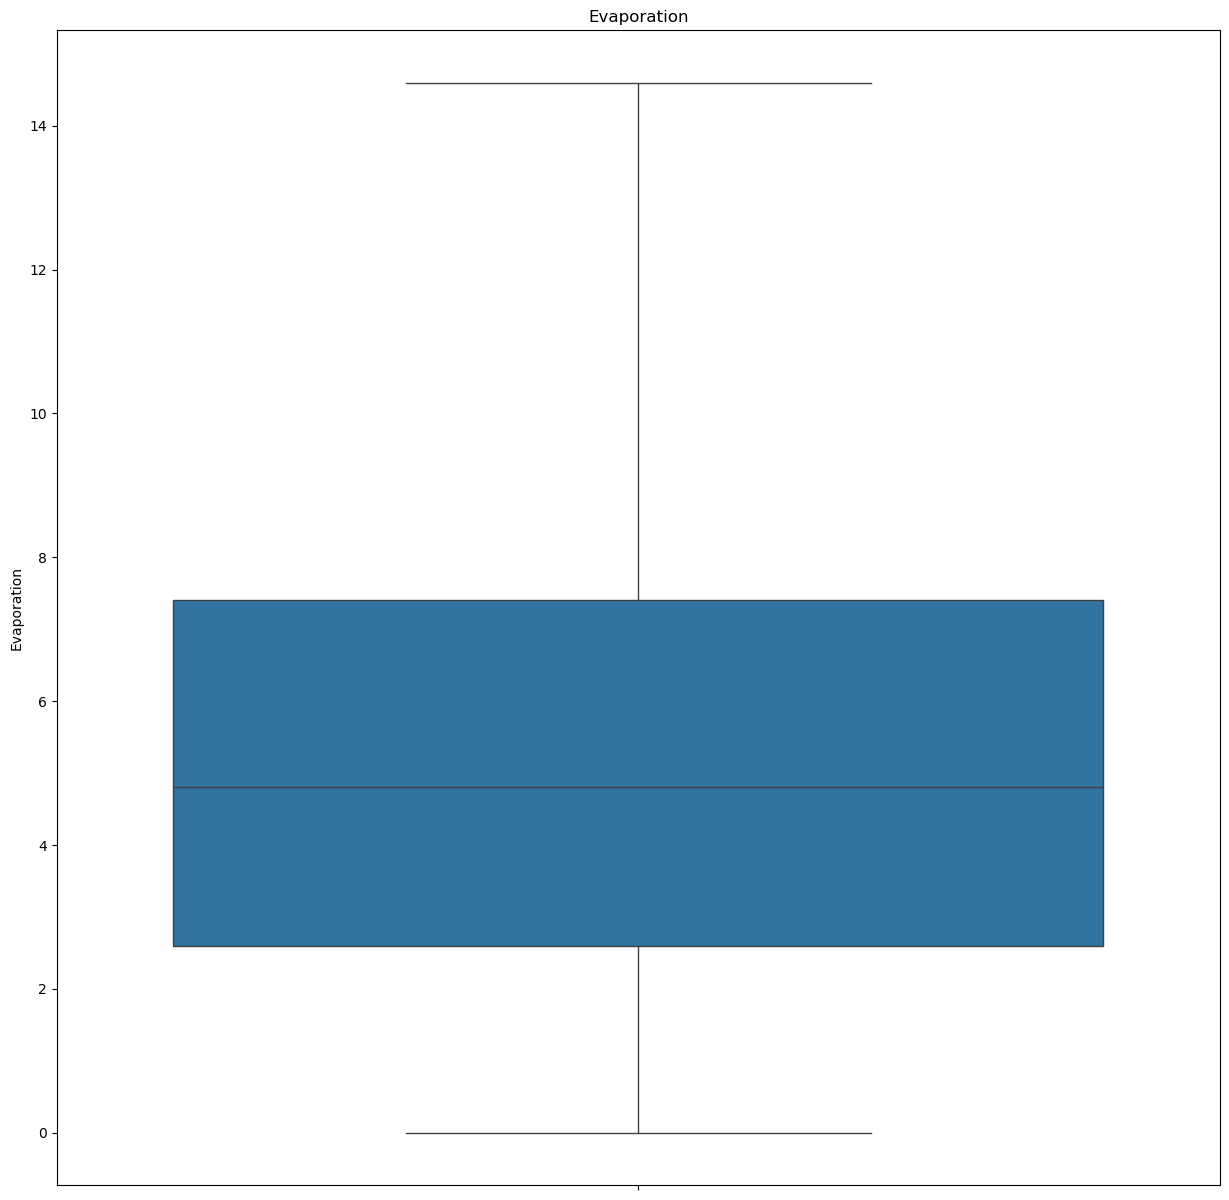

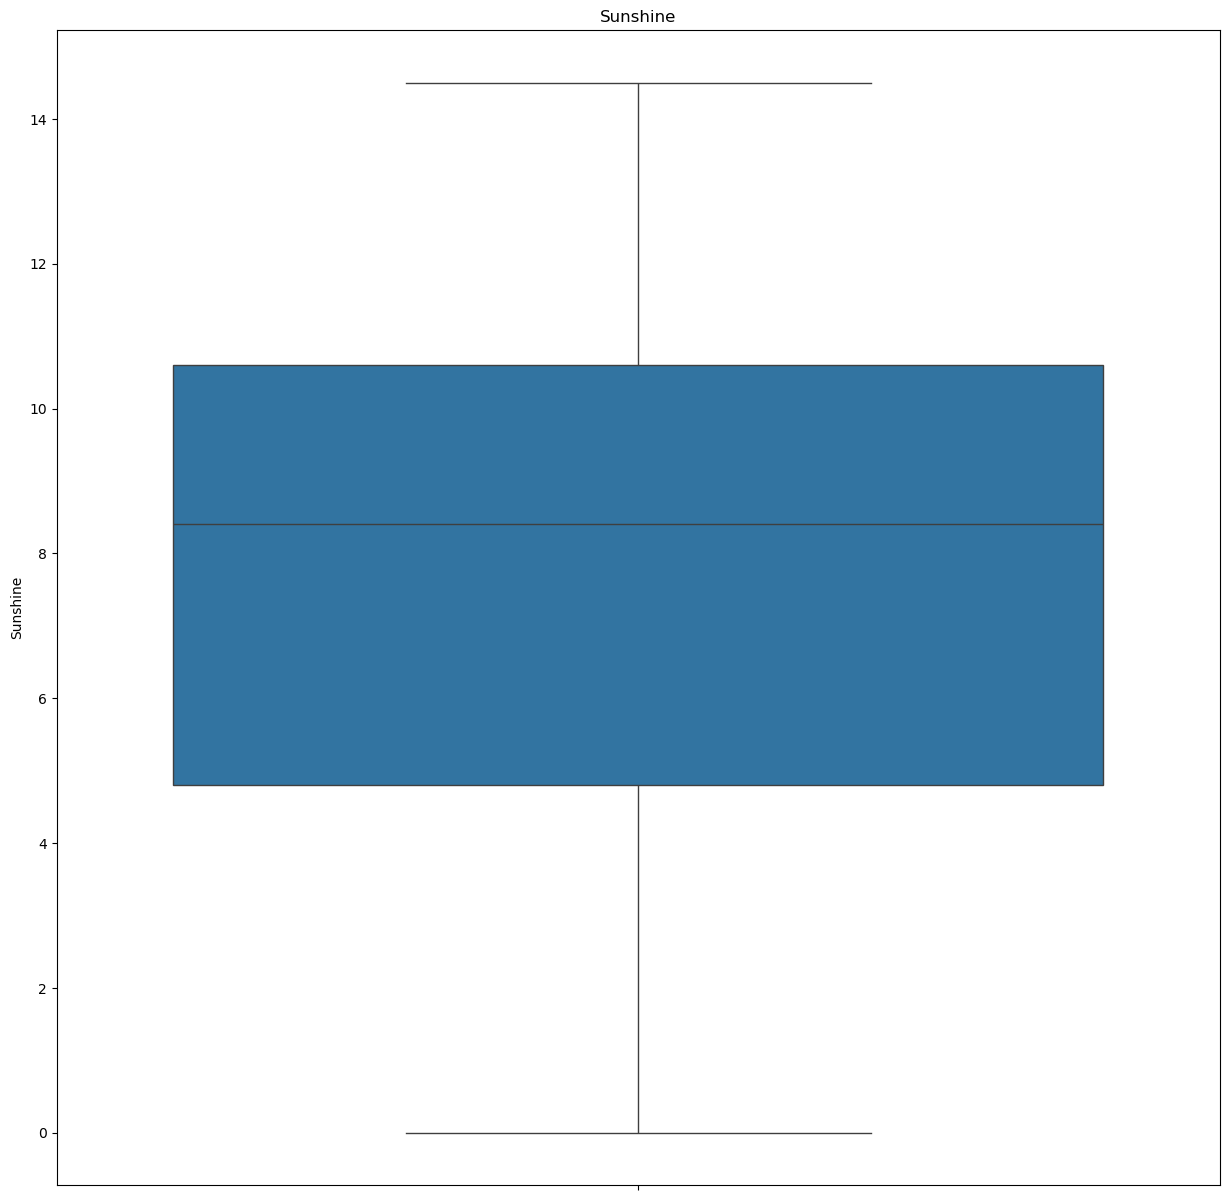

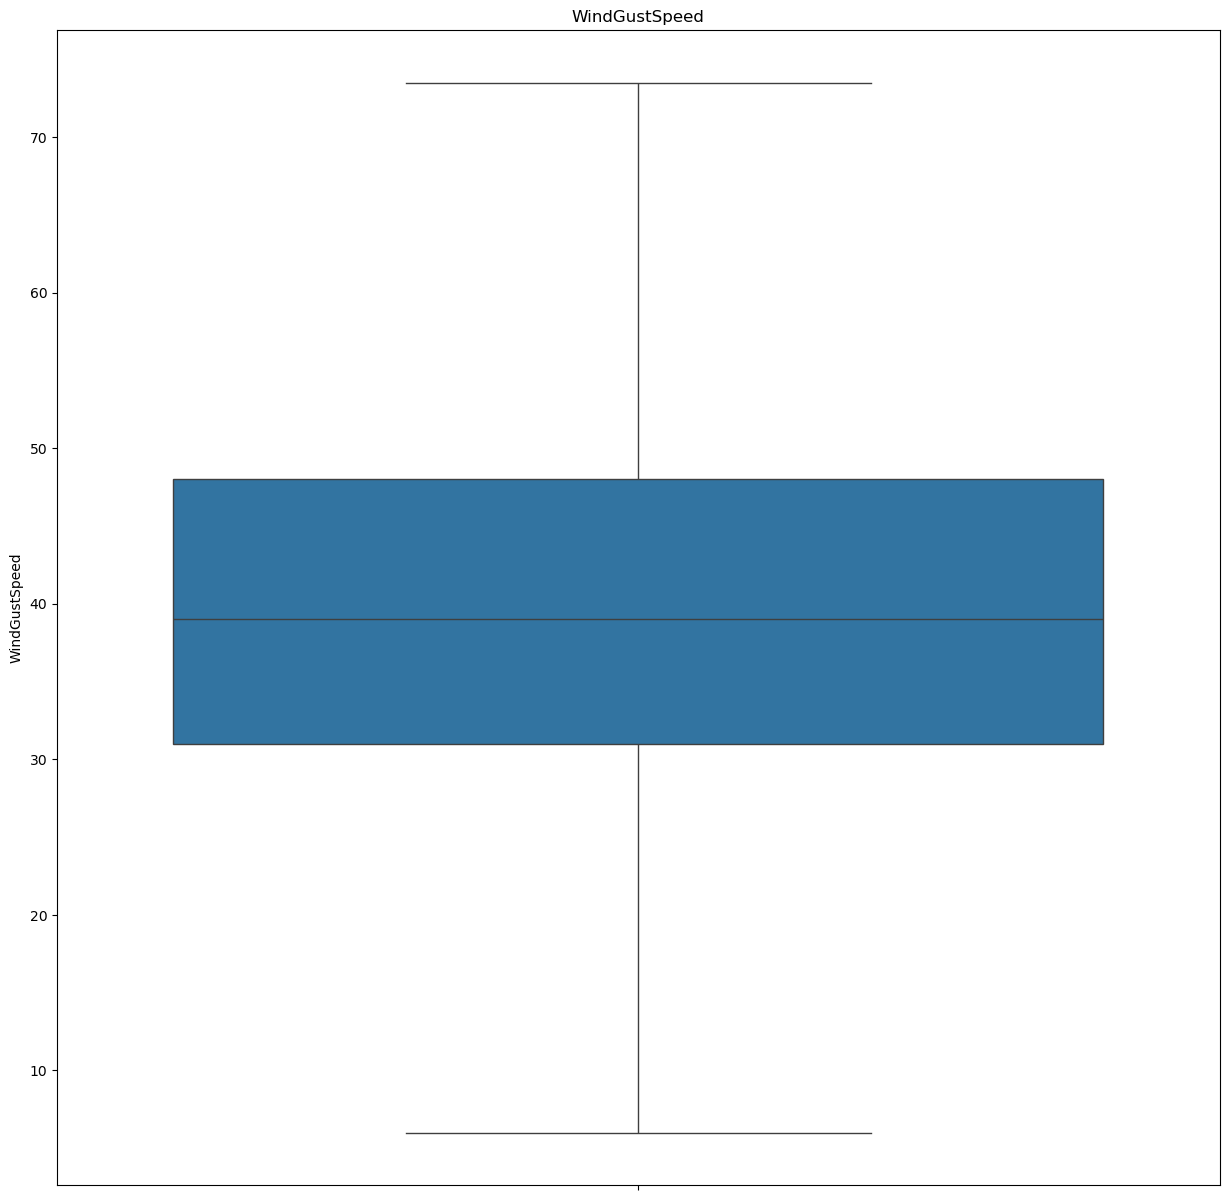

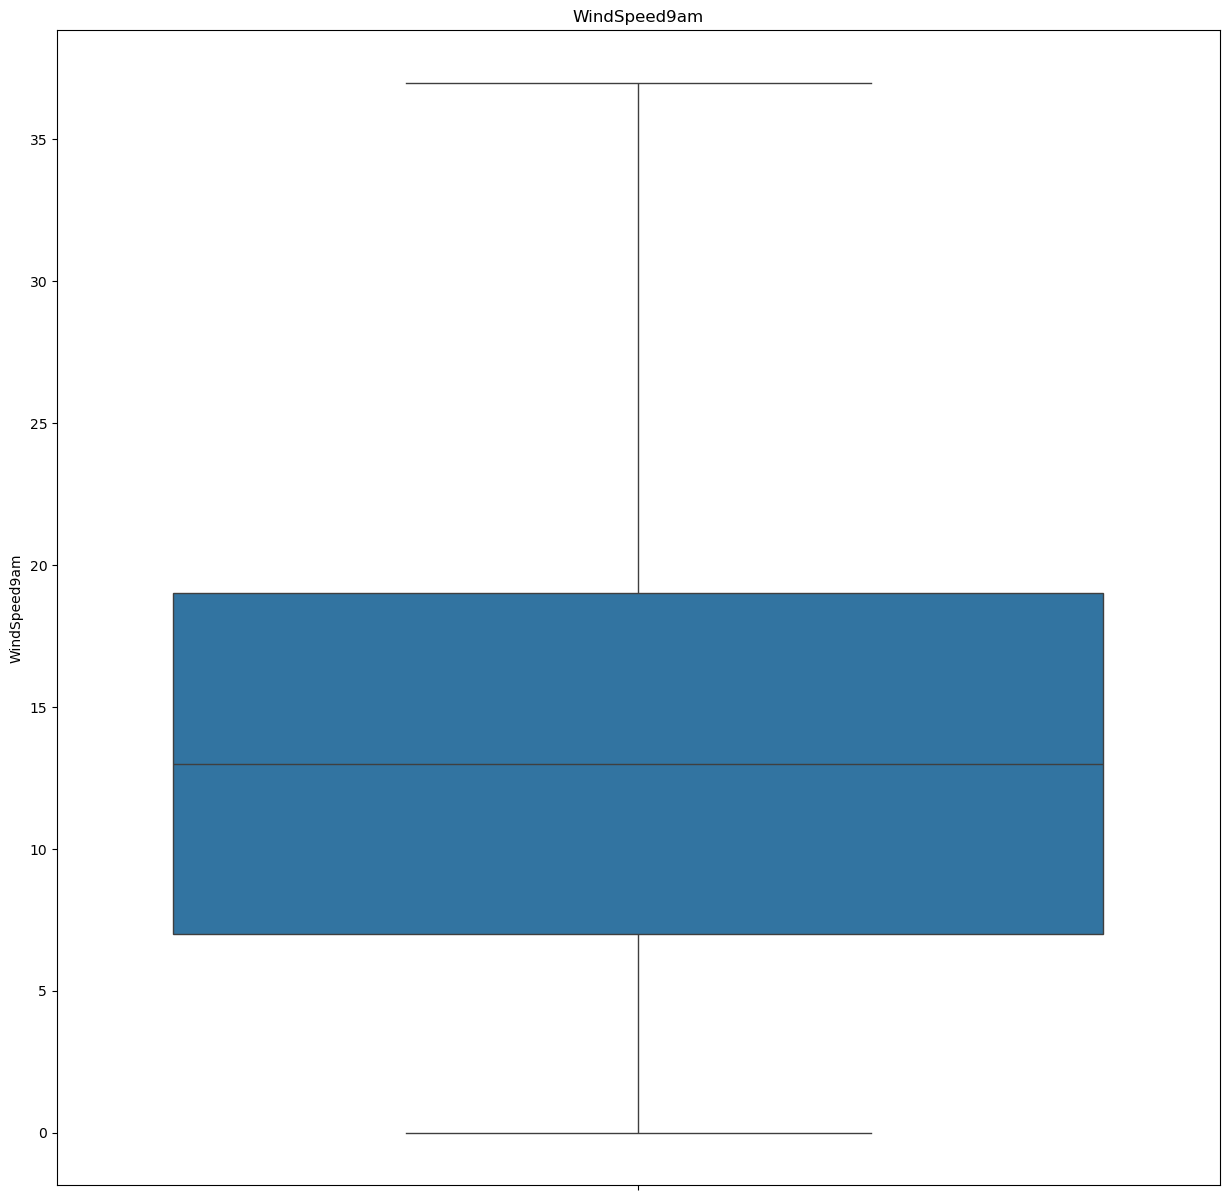

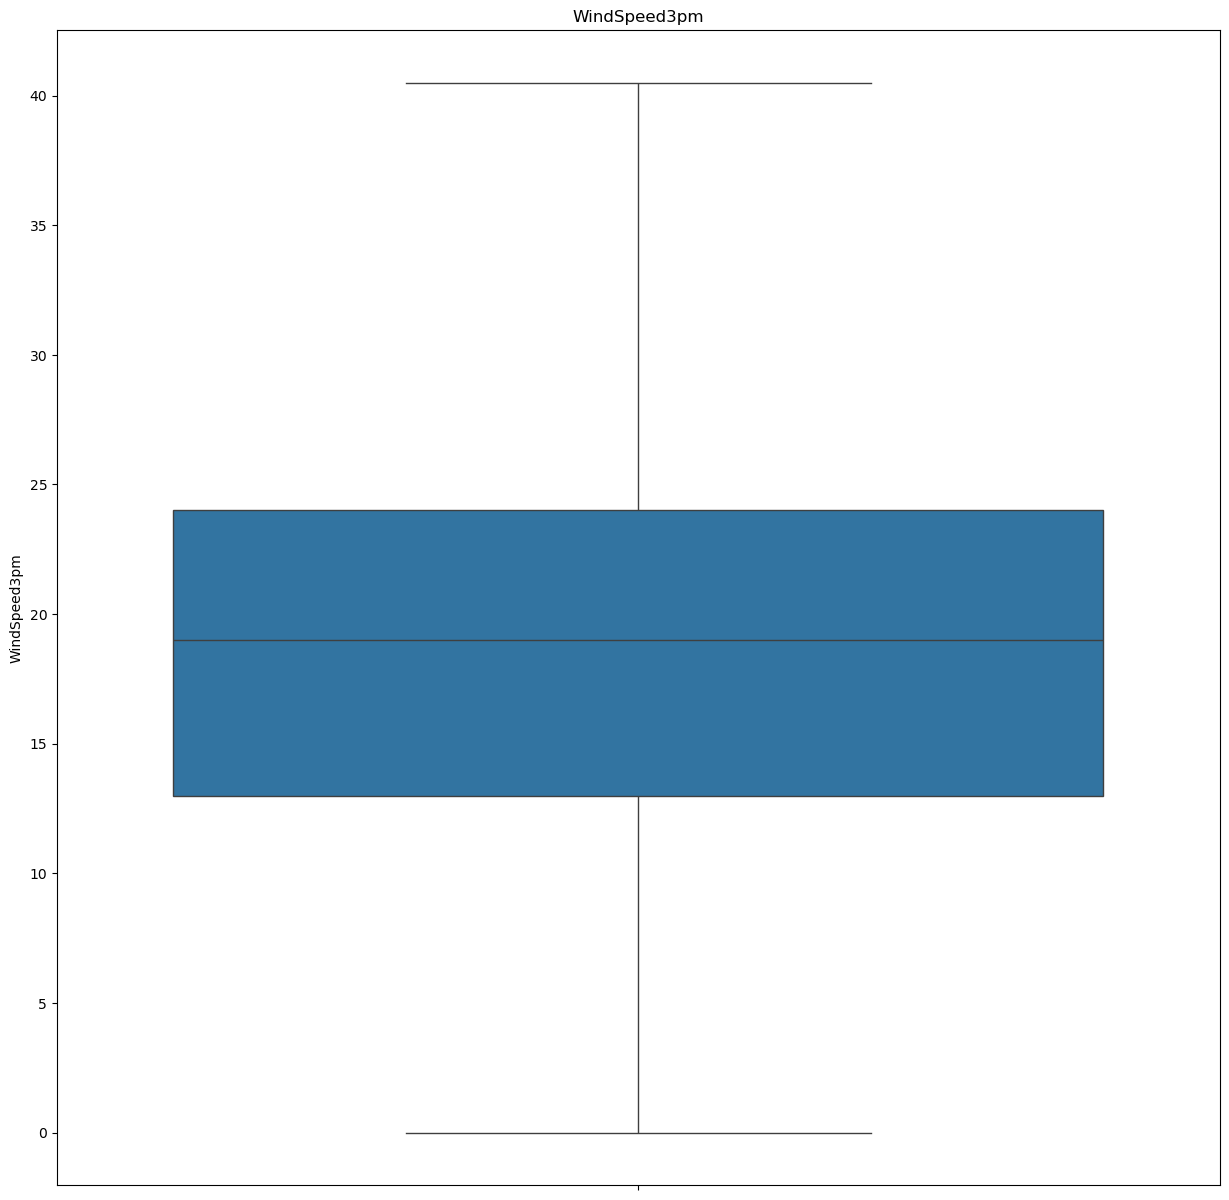

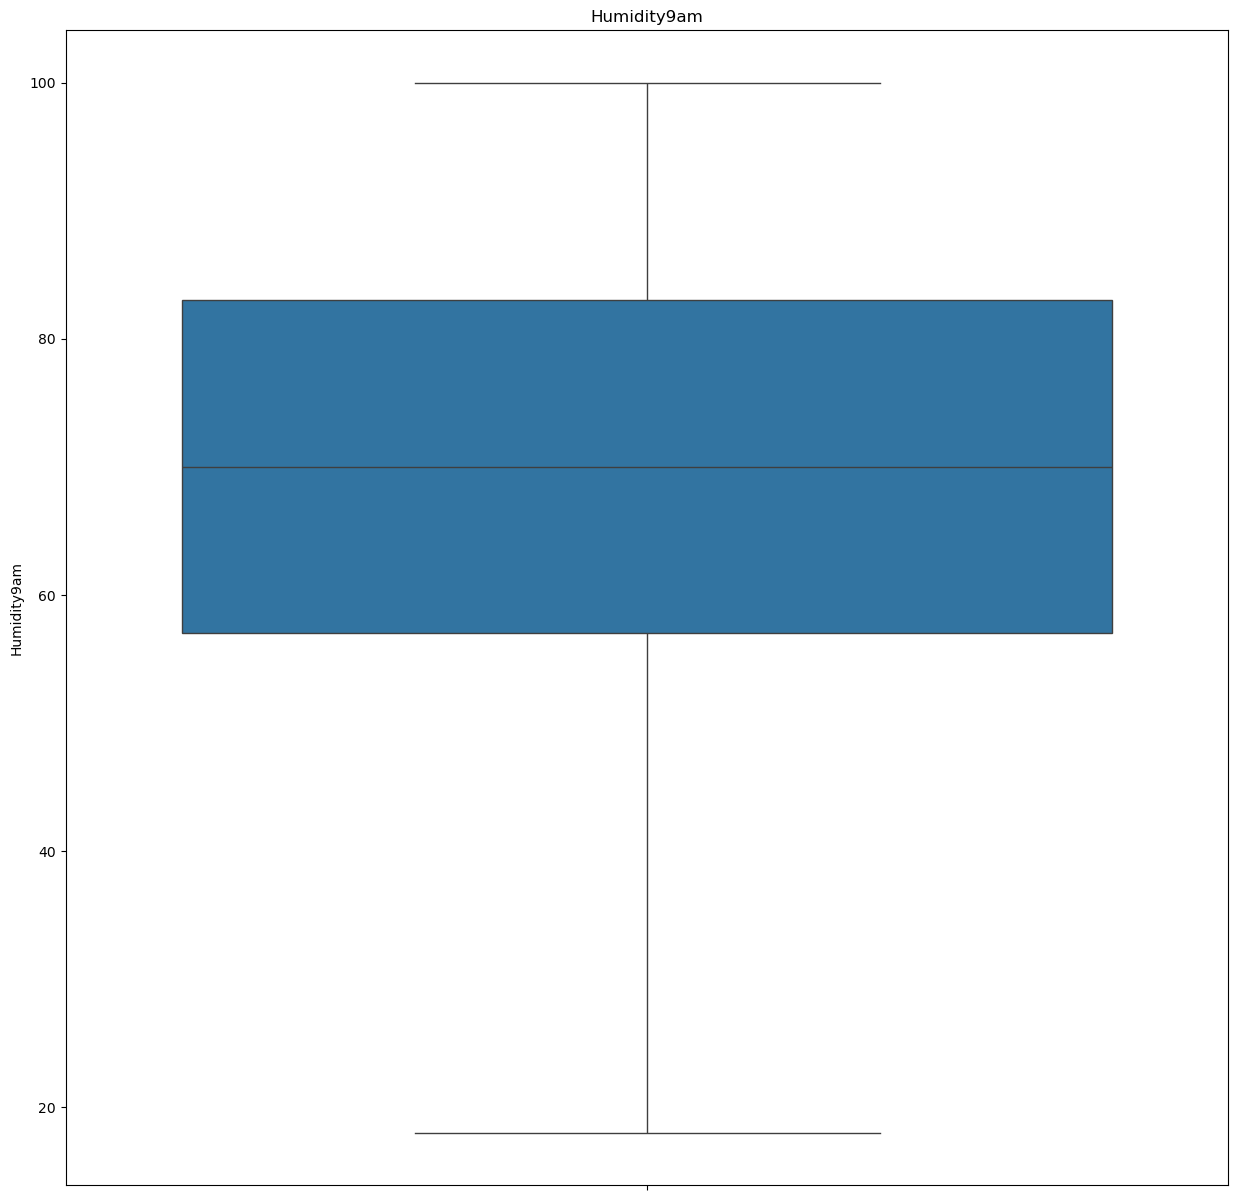

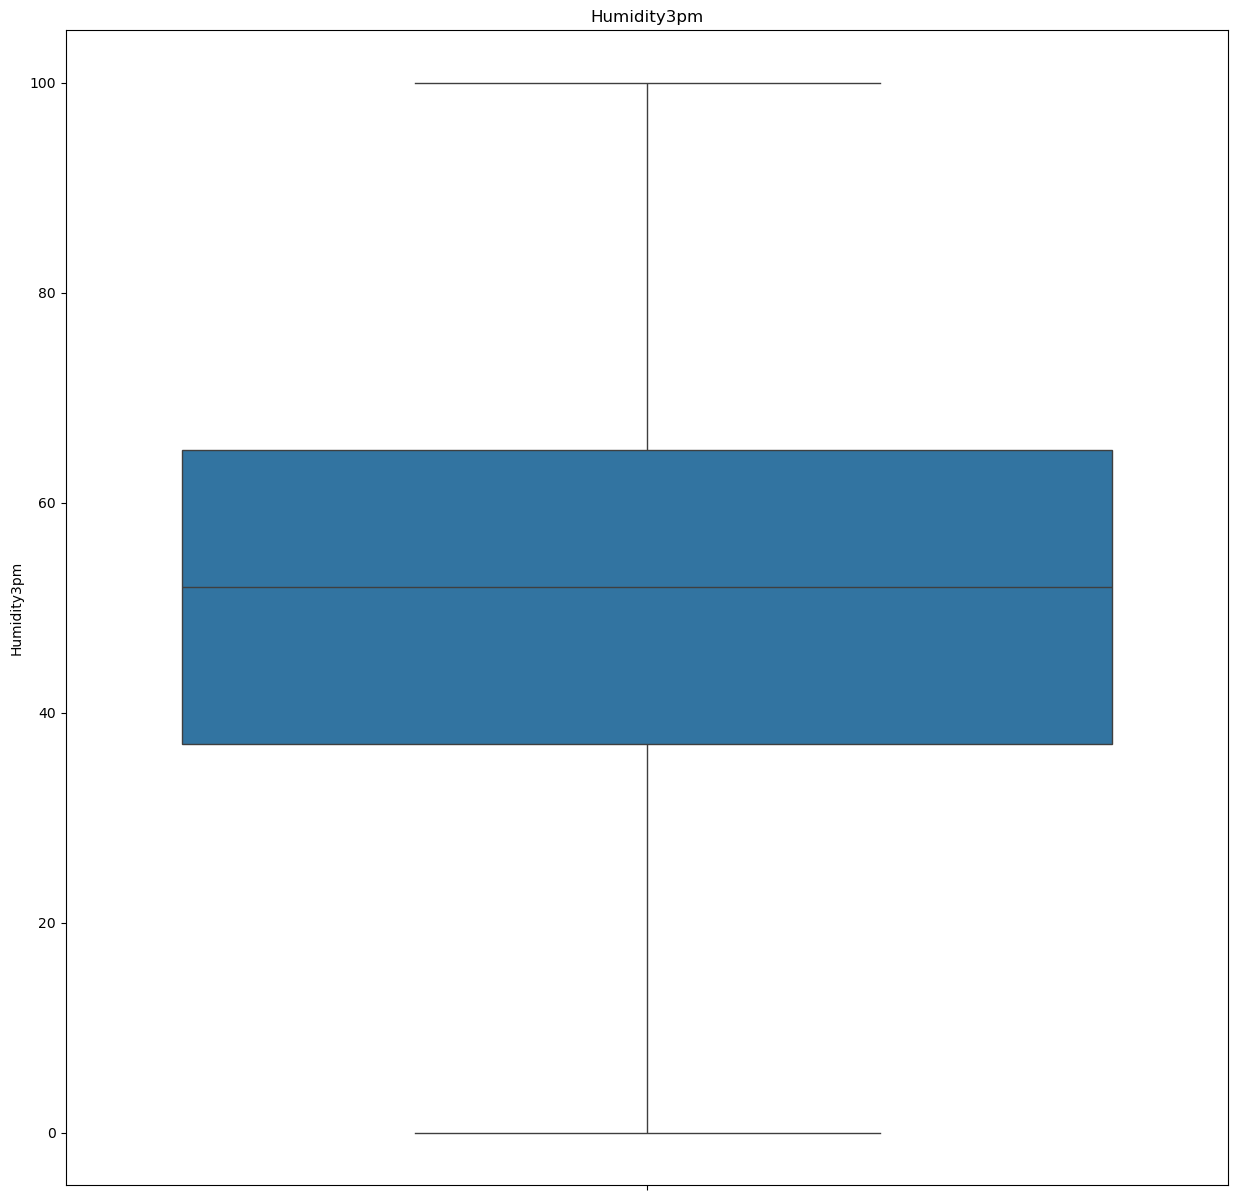

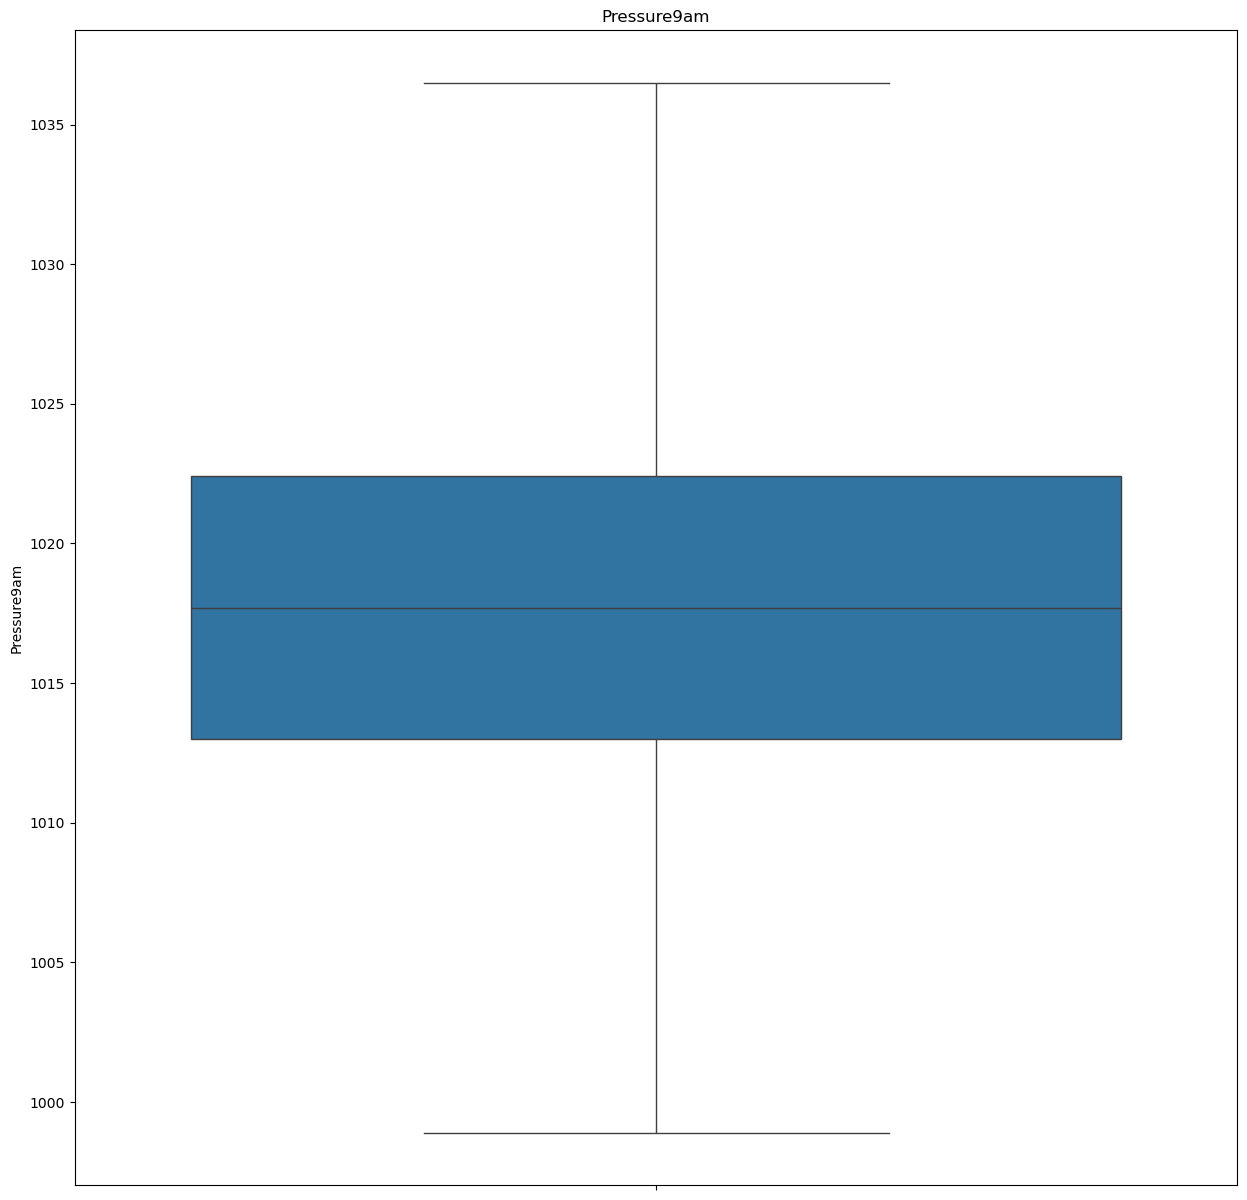

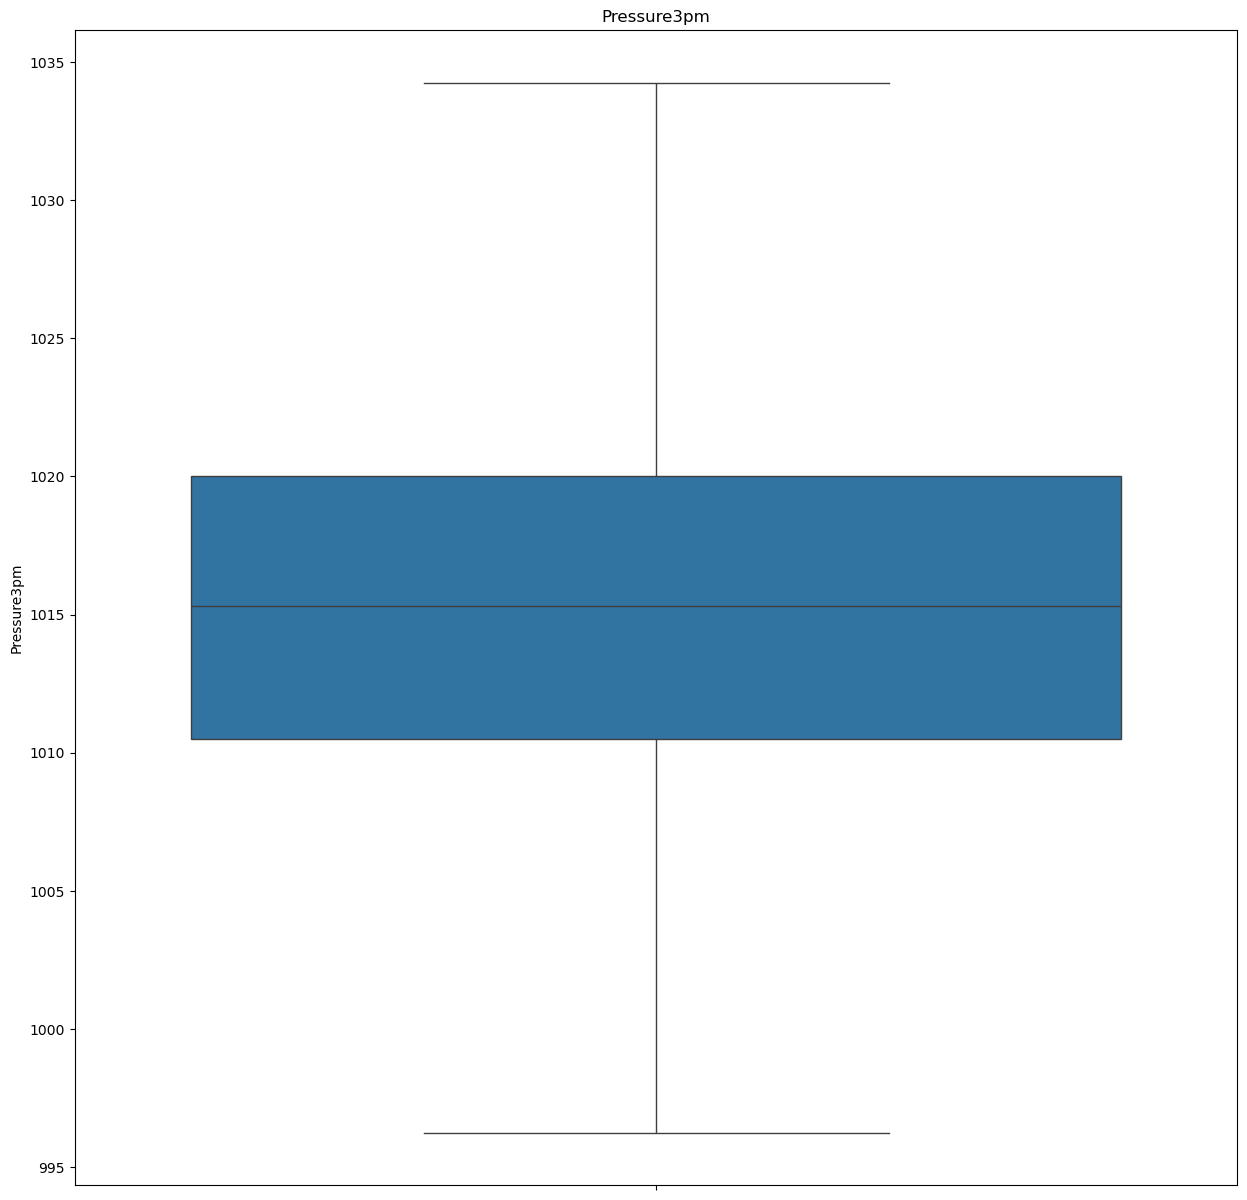

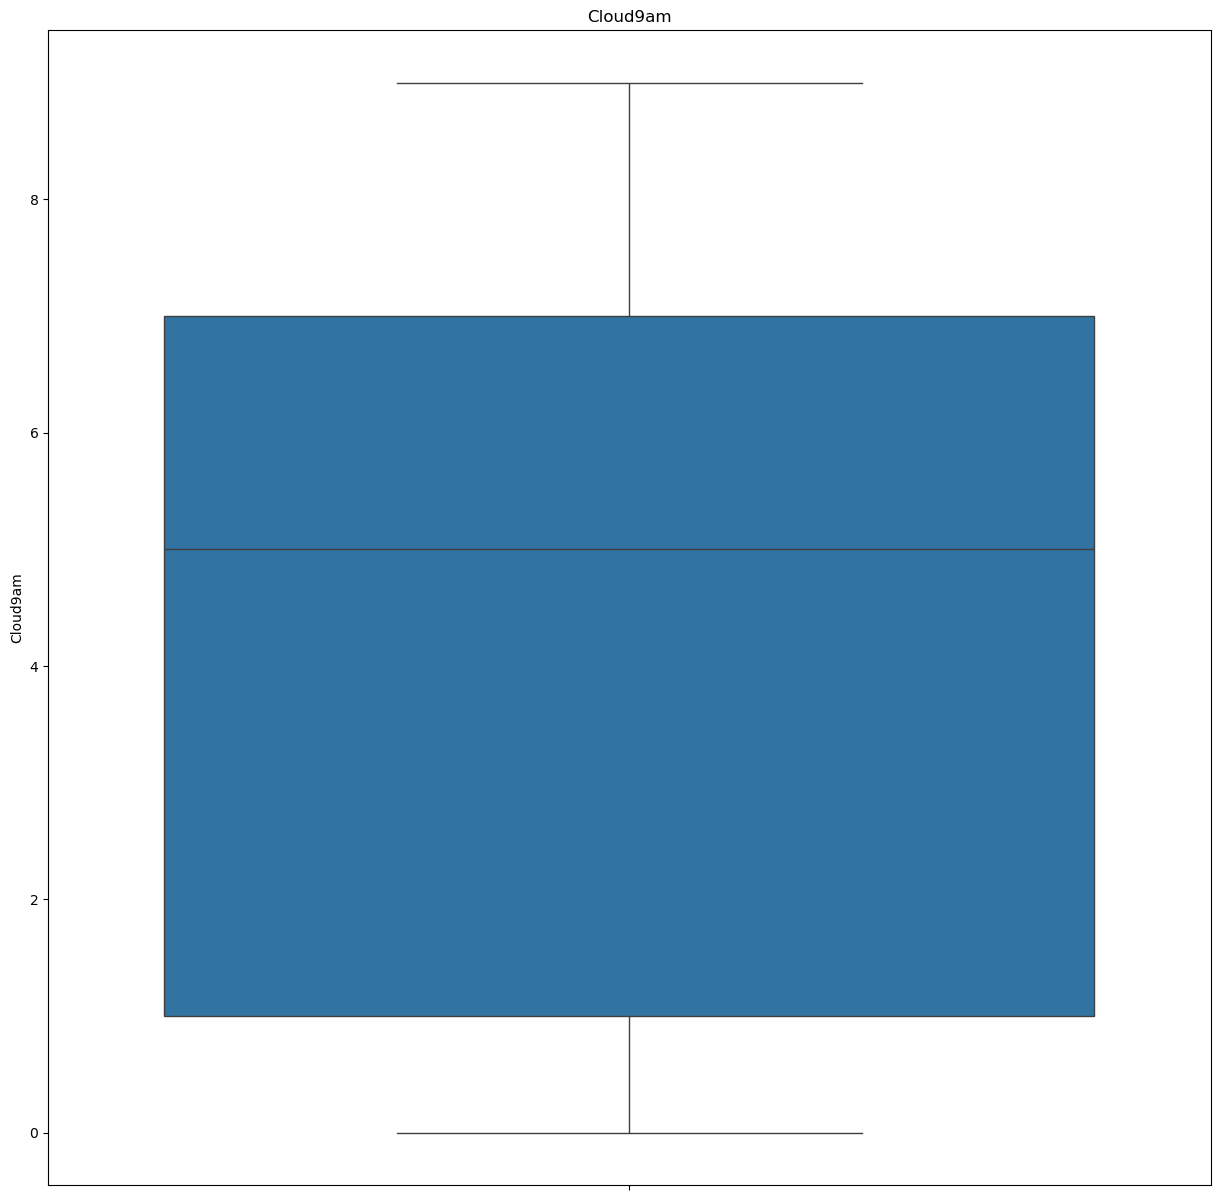

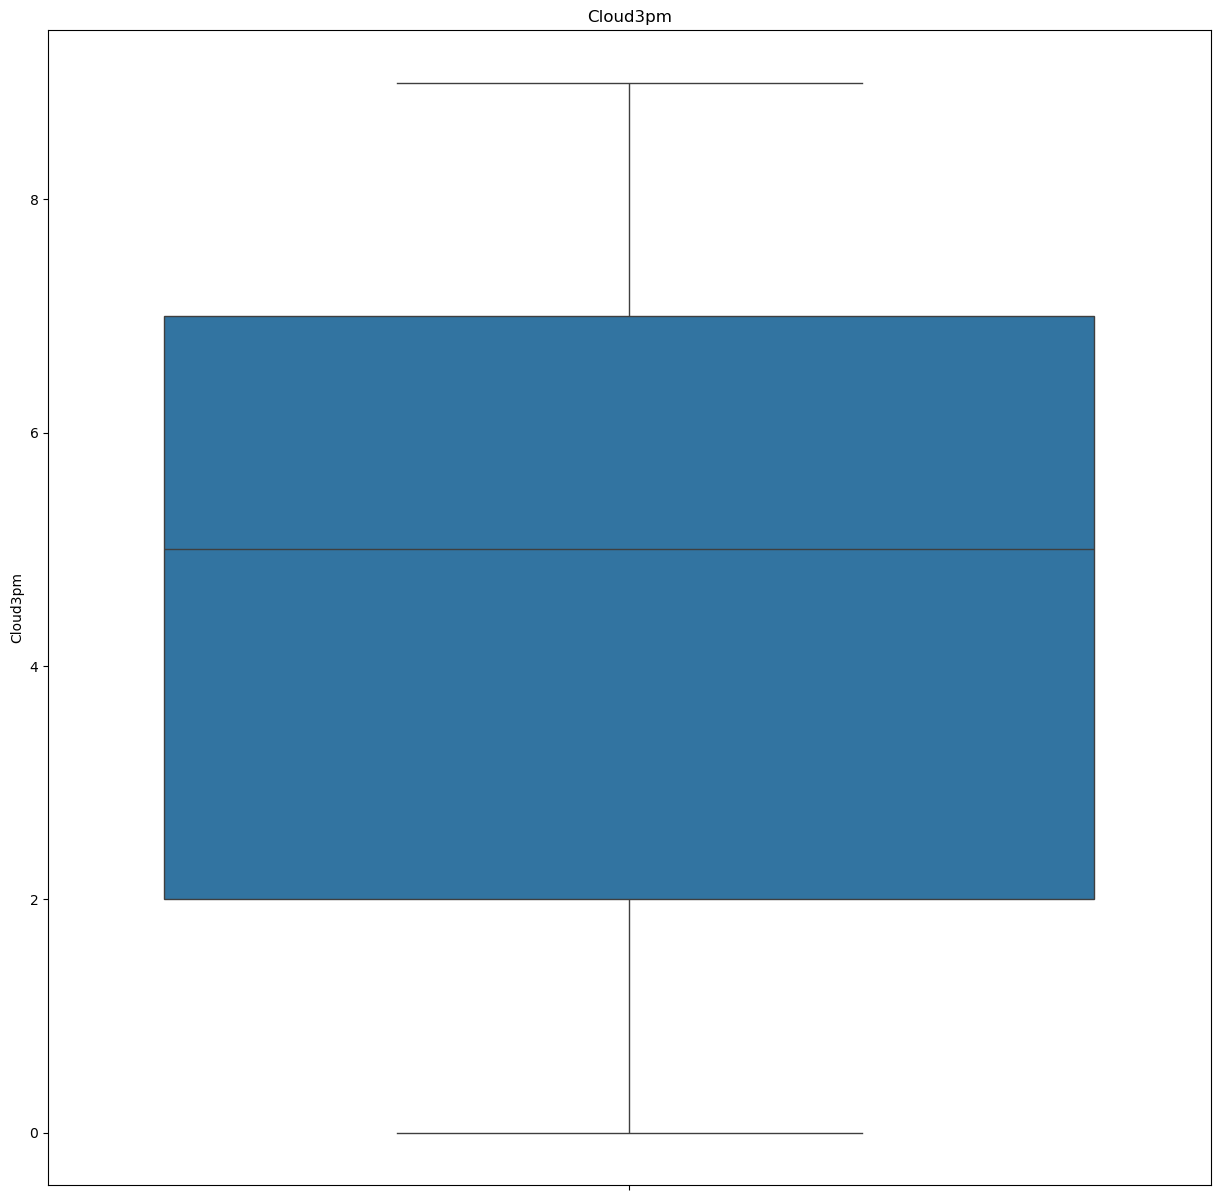

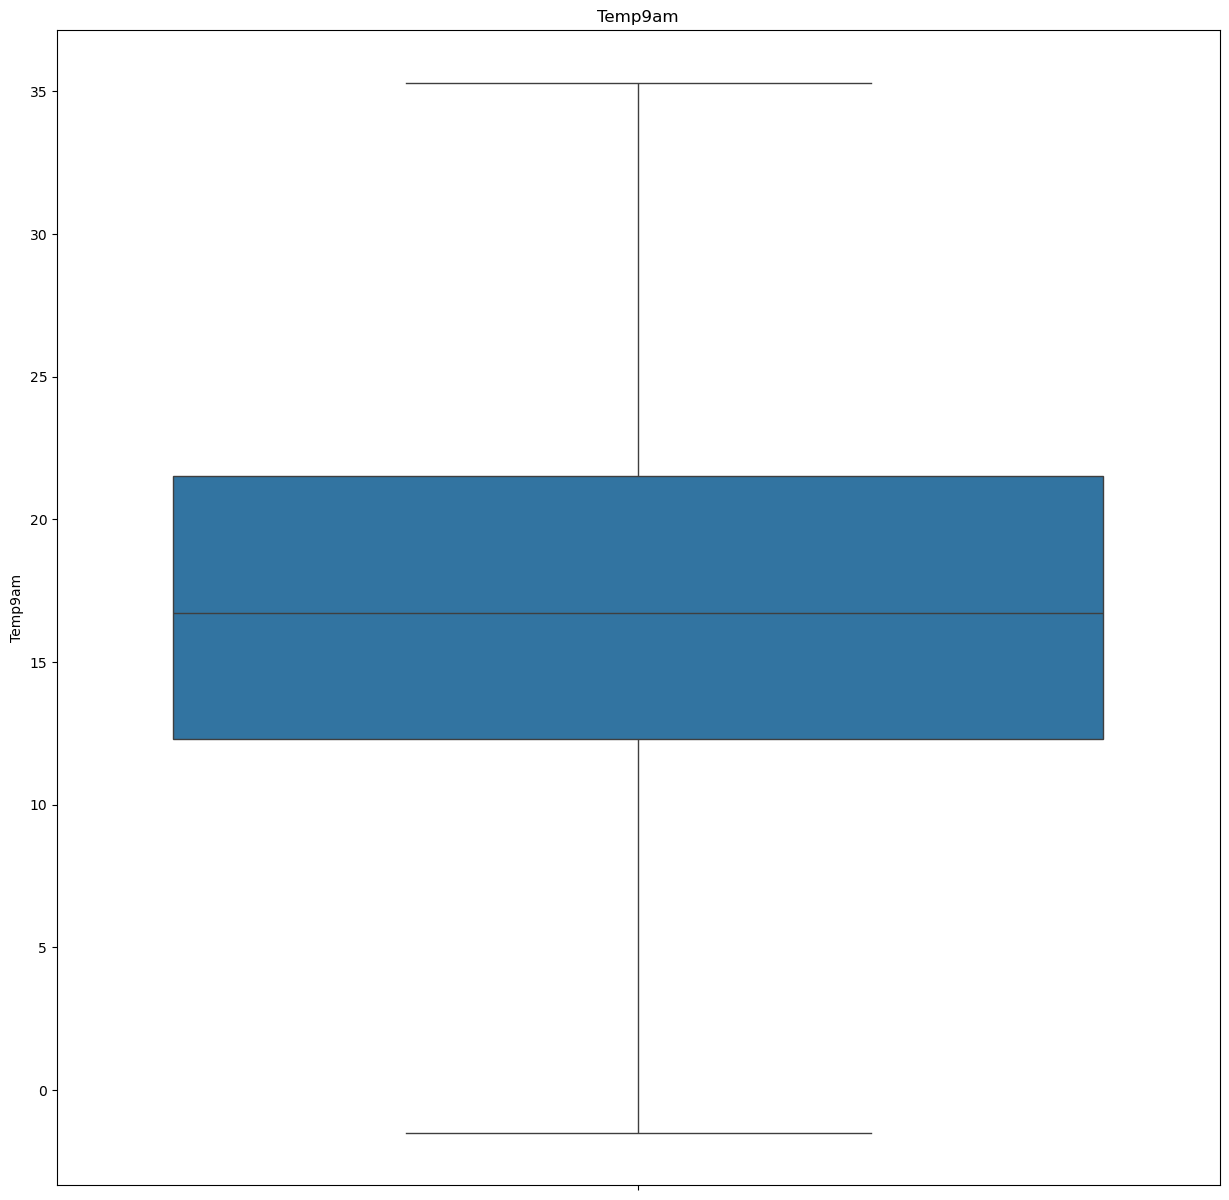

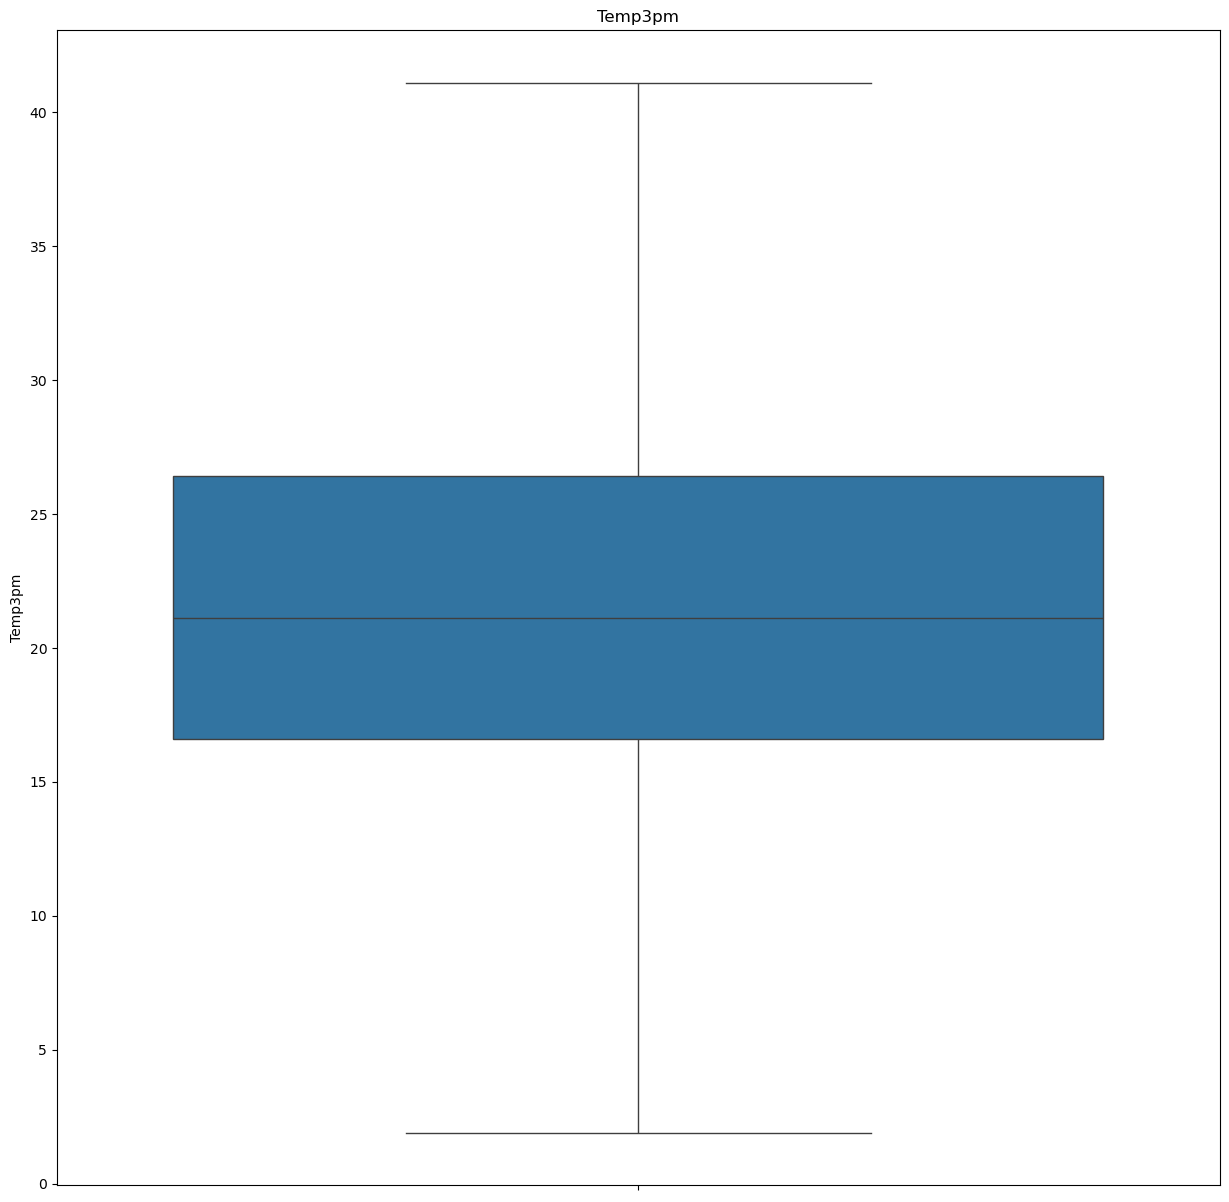

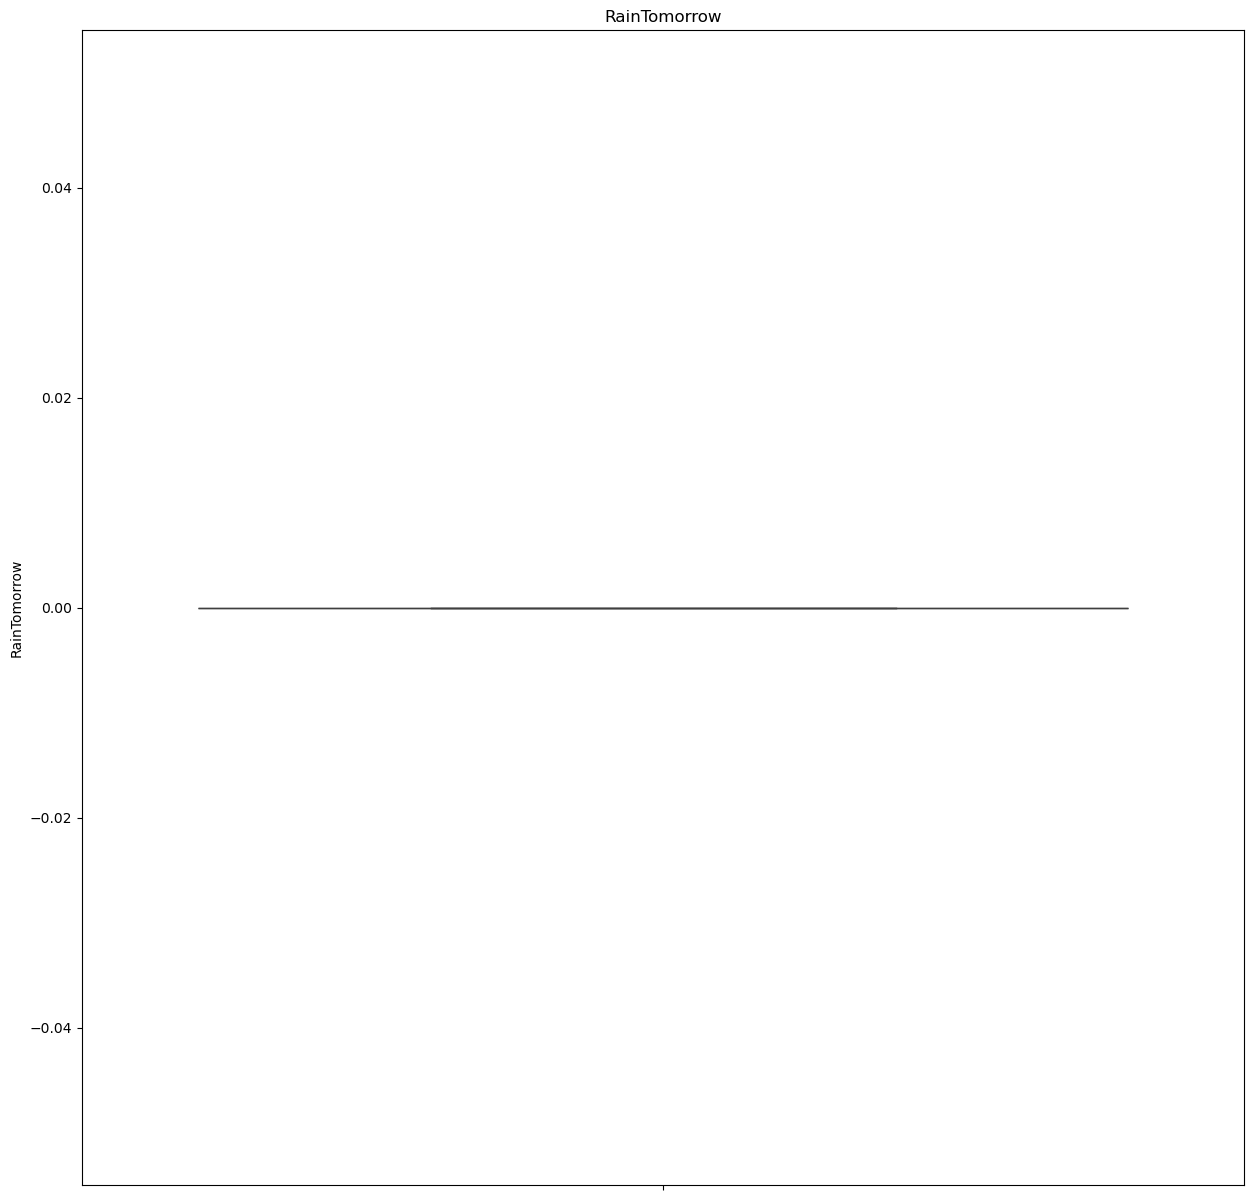

<Figure size 1500x1500 with 0 Axes>

In [75]:
for feature in numerical_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

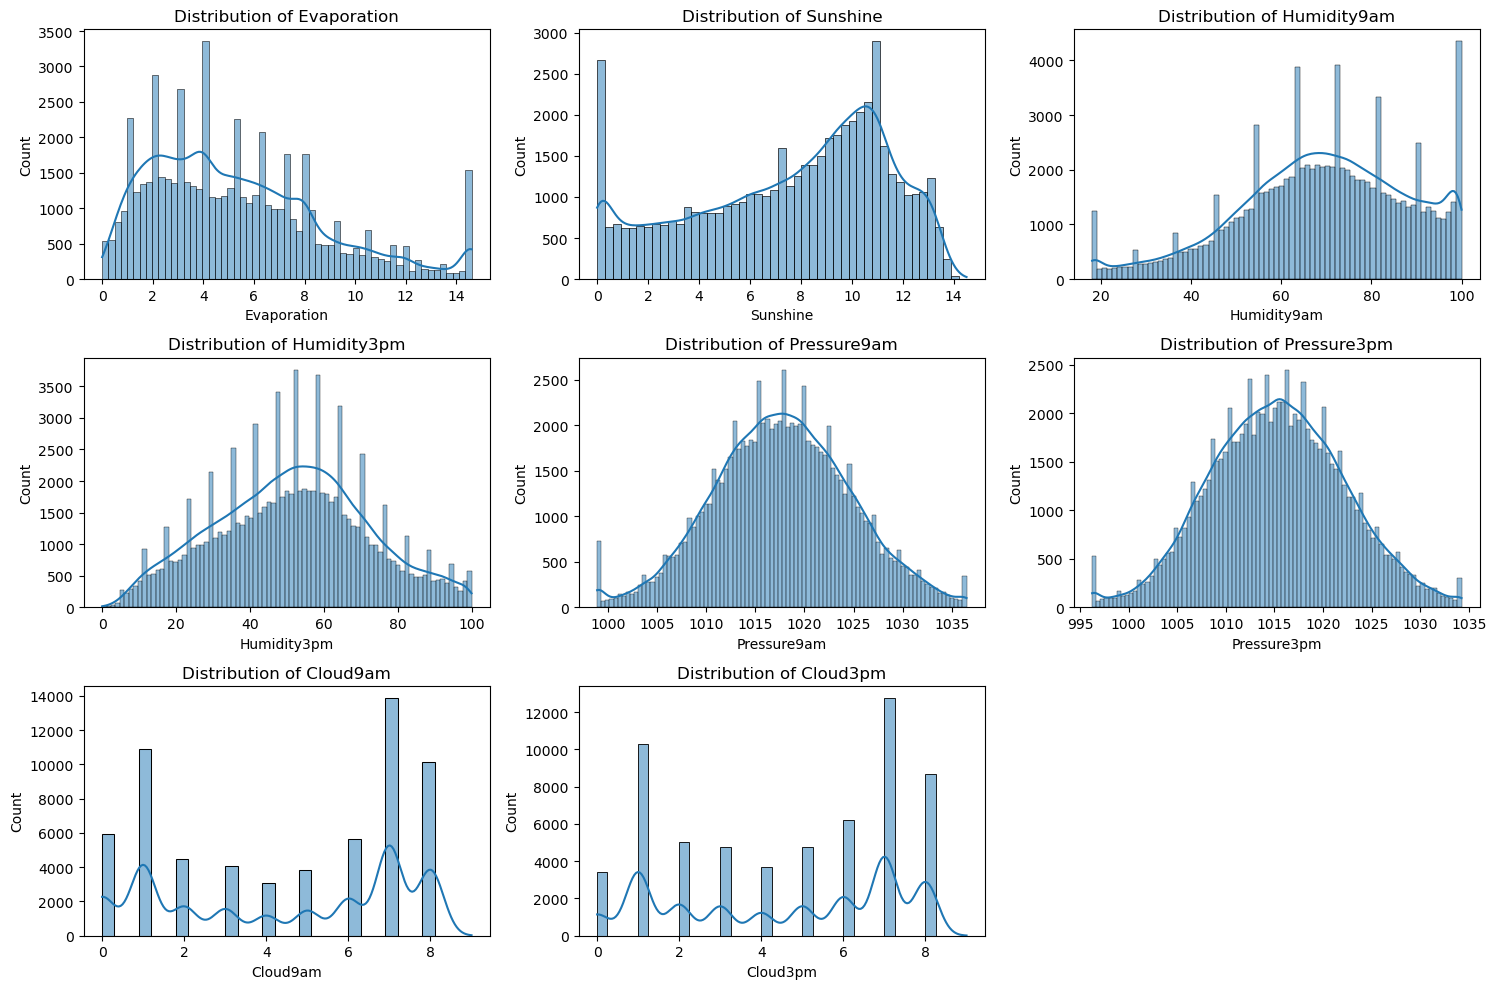

In [77]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['Evaporation','Sunshine', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()
    

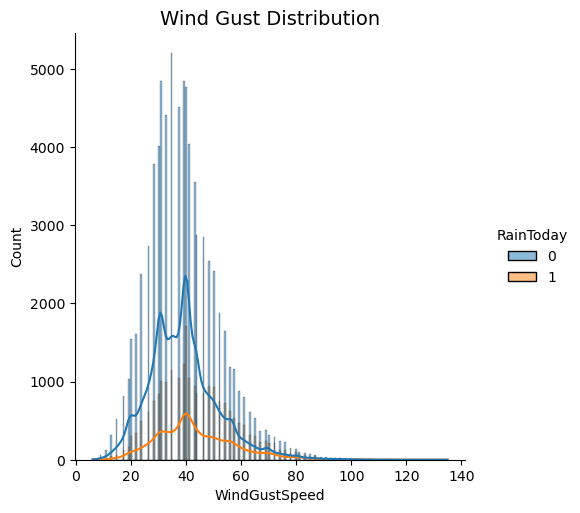

In [79]:
sns.displot(updated_weather_df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of strong wind gusts is from 6 compass points to 135 compass points and 39.98 compass points of wind gusts have the highest frequency in the dataset.

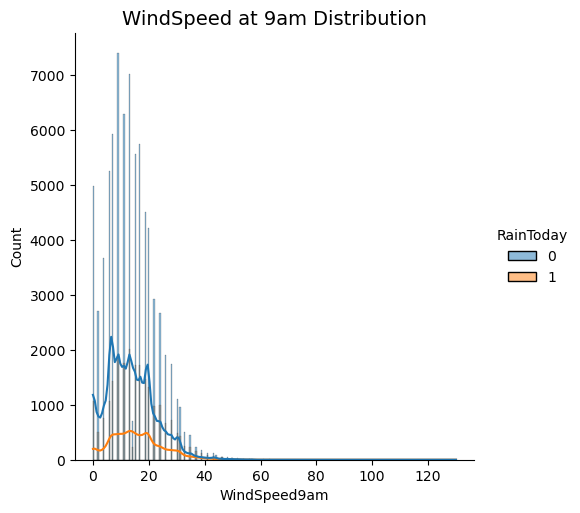

In [81]:
sns.displot(updated_weather_df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind speed at 9 am is from 0 kmph to 130 kmph and 9 kmph of wind speed has the highest frequency in the dataset.

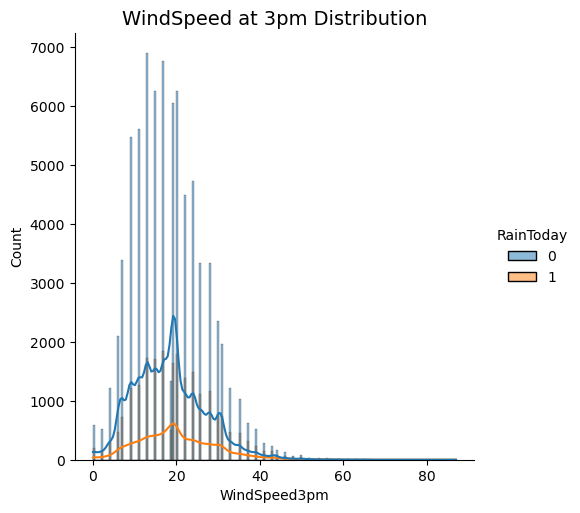

In [83]:
sns.displot(updated_weather_df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of wind speed at 3 pm is from 0 kmph to 87 kmph and 17 kmph of wind speed has the highest frequency in the dataset.



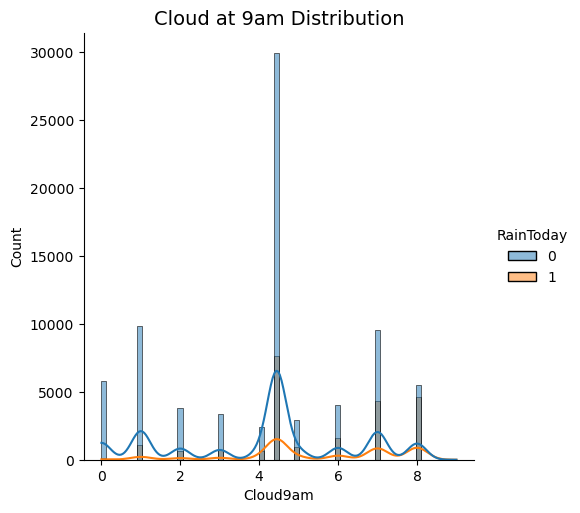

In [85]:
sns.displot(updated_weather_df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of cloud at 9 am and 3 pm is from 0 eighths to 9 eighths and 4.44 eighths of cloud at 9 am has the highest frequency in the dataset.

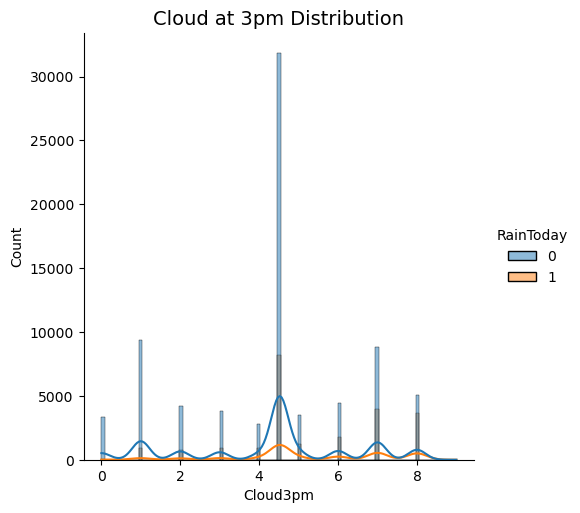

In [87]:
sns.displot(updated_weather_df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, 4.52 eighths of cloud at 3 pm has the highest frequency in the dataset.

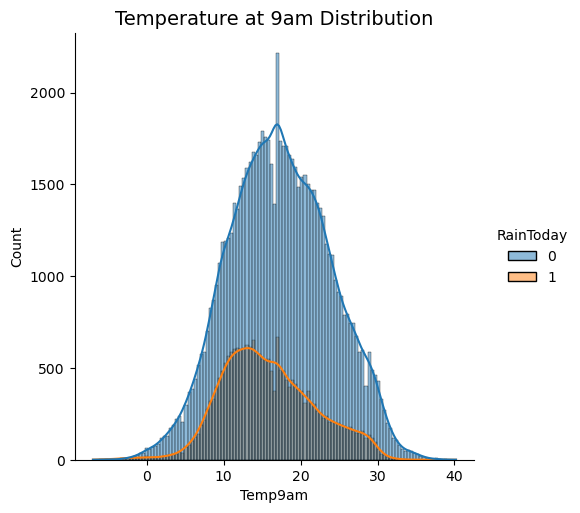

In [89]:
sns.displot(updated_weather_df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range of wind temperature at 9 am is from -7
C to 40.2
C and 17
C of temperature has the highest frequency in the dataset.

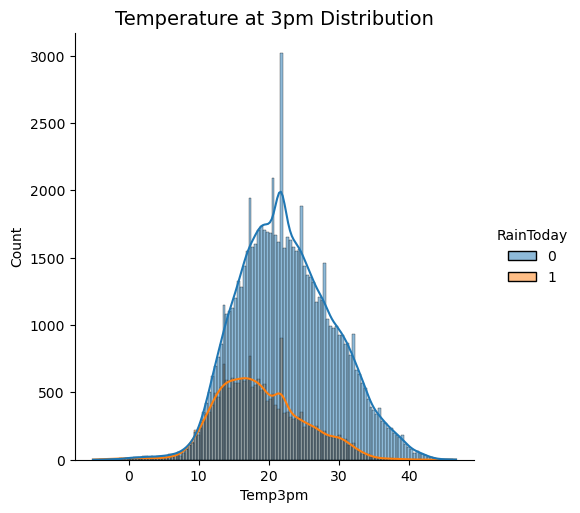

In [91]:
sns.displot(updated_weather_df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

On the other hand, the range of pressure at 3 pm is from -5.1
C to 46.7
C and 27.68
C of temperature has the highest frequency in the dataset.

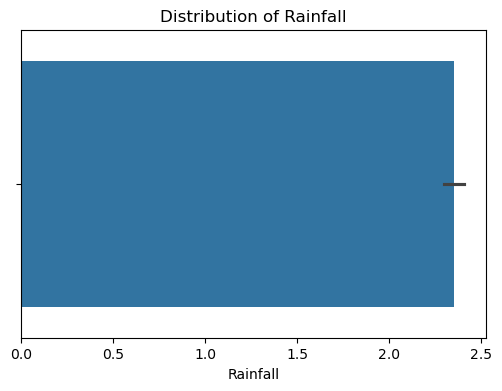

In [93]:
plt.figure(figsize=(6, 4))
sns.barplot(x="Rainfall", data=weather_df)
plt.title("Distribution of Rainfall")
plt.show()

In [95]:
column_data = updated_weather_df.iloc[:, 11:]

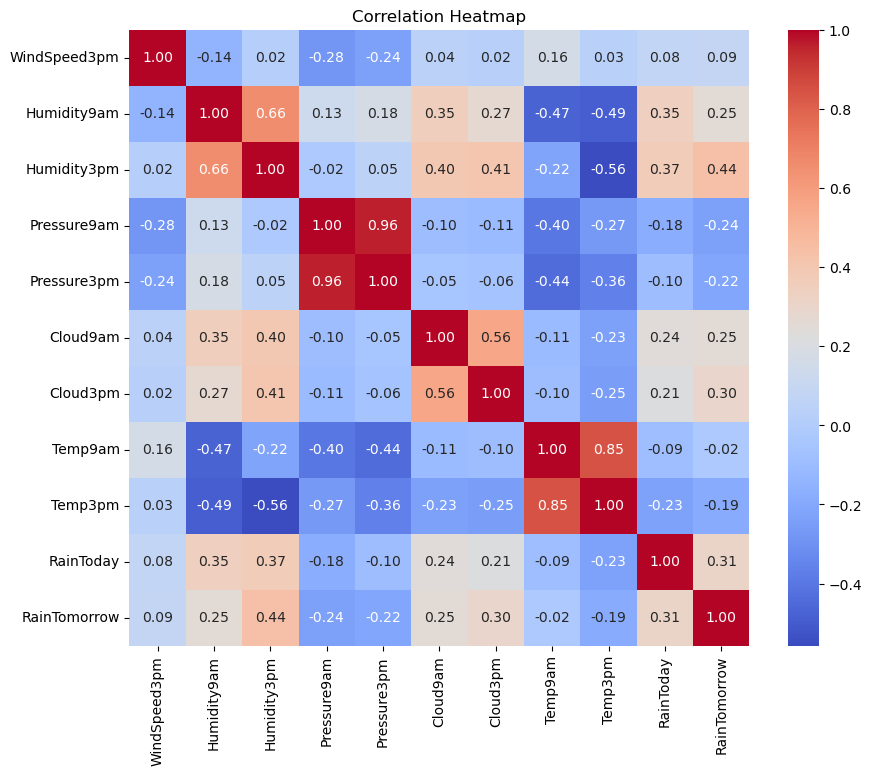

In [97]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(column_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

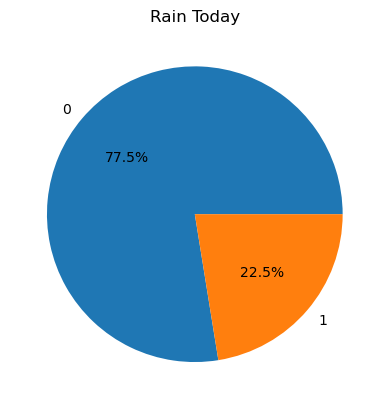

In [99]:
plt.pie(updated_weather_df['RainToday'].value_counts().values, labels=updated_weather_df['RainToday'].value_counts().index, autopct='%1.1f%%')
plt.title("Rain Today")
plt.show()

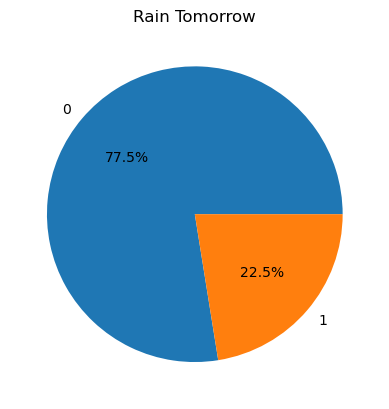

In [101]:
plt.pie(updated_weather_df['RainTomorrow'].value_counts().values, labels=updated_weather_df['RainTomorrow'].value_counts().index, autopct='%1.1f%%')
plt.title("Rain Tomorrow")
plt.show()

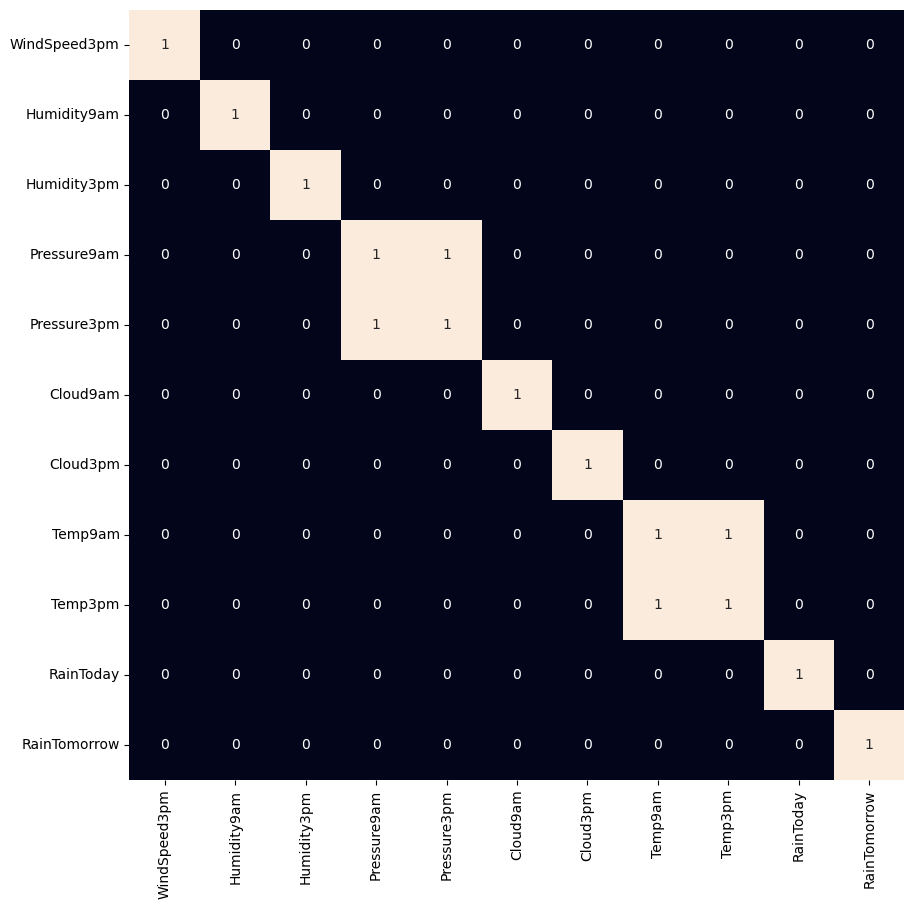

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(updated_weather_df.iloc[:,11:].corr() > 0.8, annot=True, cbar=False)
plt.show()

## Exploratory Data Analysis

### Average WindSpeed Analysis

In [105]:
windspeed_weather_df = updated_weather_df.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

,Location,WindSpeed9am,WindSpeed3pm
0,Adelaide,10.005519,15.525070
1,Albany,12.564695,18.847500
2,Albury,8.208690,14.411579
3,AliceSprings,14.658804,18.019184
4,BadgerysCreek,8.132324,14.019945


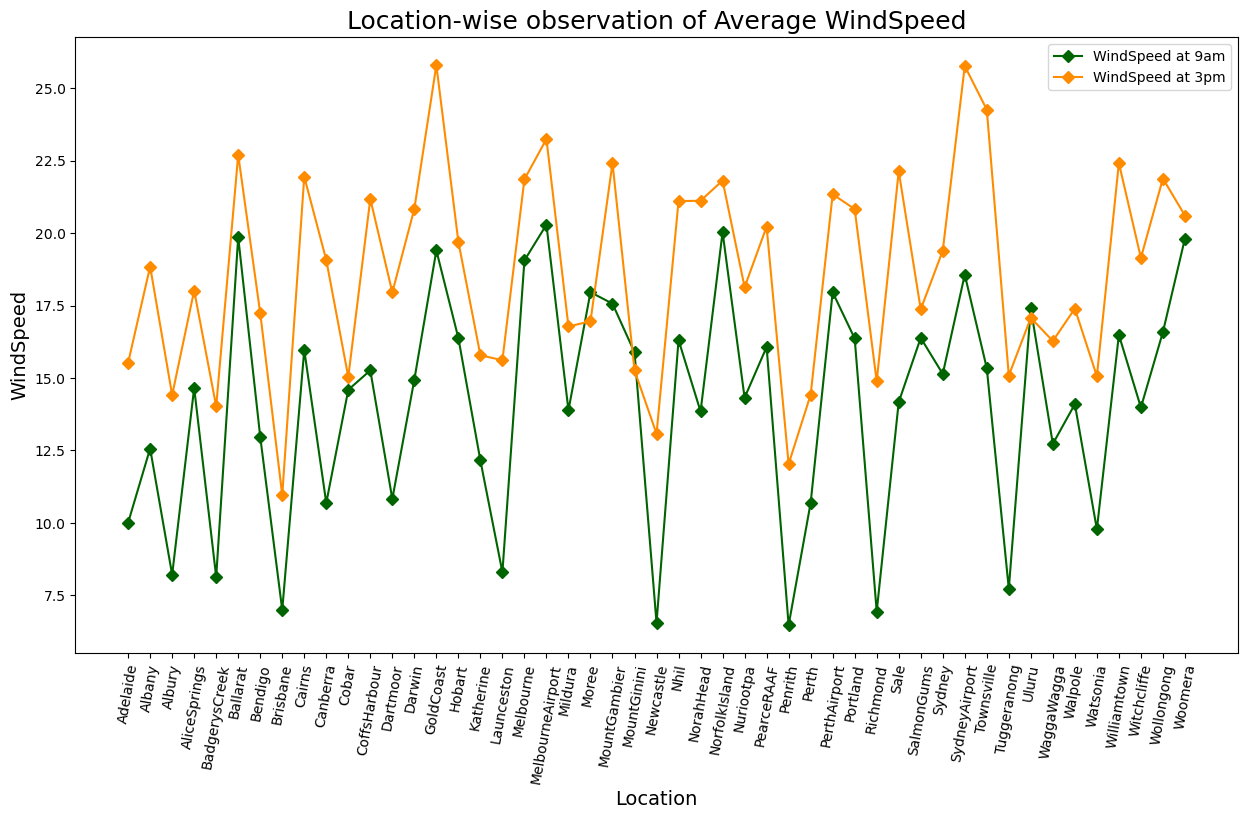

In [107]:
x = windspeed_weather_df.loc[:, 'Location']
y1 = windspeed_weather_df['WindSpeed9am'] 
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Location-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the wind speed of the Melbourne Airport at 9 am has the highest wind speed at 20.29 kmph. On the other hand, at 3 pm the Gold Coast of Australia has the highest wind speed at 25.77 kmph. Finally, it can be concluded that the wind speed at 3 pm is much higher than the wind speed at 9 am.

### Average Humidity Analysis

In [109]:
humidity_weather_df = updated_weather_df.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.head()

,Location,Humidity9am,Humidity3pm
0,Adelaide,60.082001,45.008601
1,Albany,74.742430,63.826466
2,Albury,74.309461,48.107983
3,AliceSprings,39.875224,24.305207
4,BadgerysCreek,76.677018,51.166781


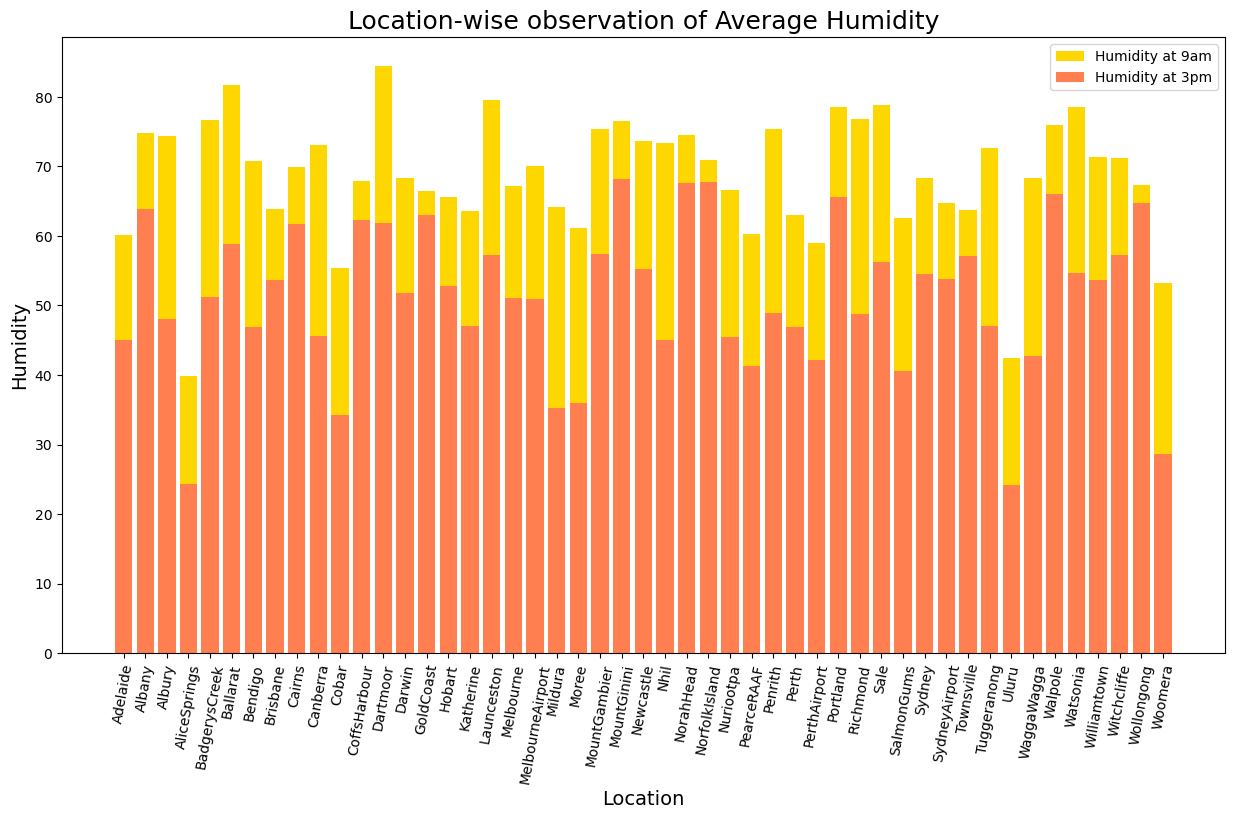

In [111]:
x = humidity_weather_df.loc[:, 'Location']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am') 
plt.bar(x, y2, color = 'coral',label = 'Humidity at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Location-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the humidity of the Dartmoor at 9 am has the highest humidity as 84.38%. On the other hand, at 3 pm the MountGinini of Australia has the highest humidity as 68.24%. Finally, it can be concluded that humidity at 9 am is much higher than the wind speed at 3 pm.

### Average Pressure Analysis

In [113]:
pressure_weather_df = updated_weather_df.groupby(['Location'])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.head()

,Location,Pressure9am,Pressure3pm
0,Adelaide,1018.709193,1016.774348
1,Albany,1018.366913,1016.573801
2,Albury,1018.382073,1015.759551
3,AliceSprings,1016.610611,1012.806830
4,BadgerysCreek,1018.533488,1015.740251


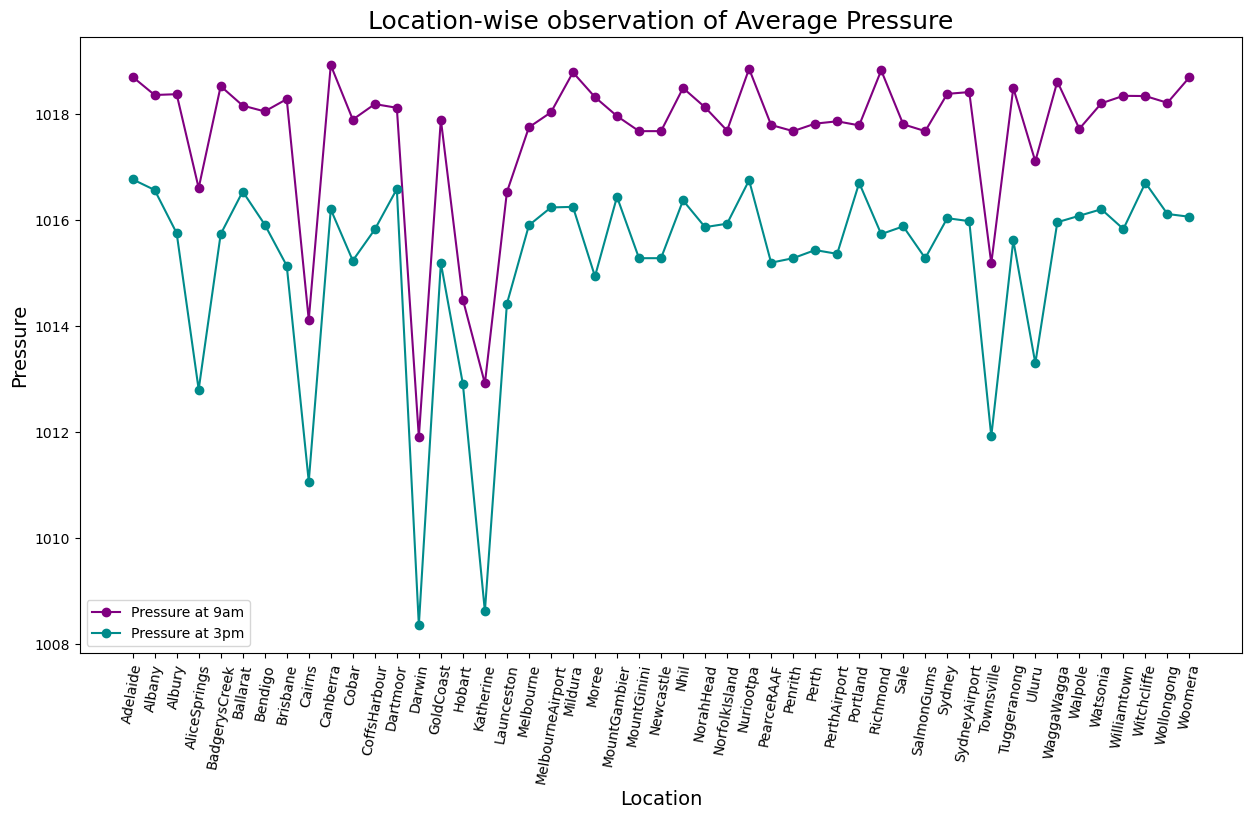

In [115]:
x = pressure_weather_df.loc[:, 'Location']
y1 = pressure_weather_df['Pressure9am'] 
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am') 
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Location-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

During this analysis, it has been found that the pressure of Canberra at 9 am has the highest pressure as 1018.93 hPa. On the other hand, at 3 pm the Adelaide of Australia has the highest pressure as 1016.79 hPa. Finally, it can be concluded that pressure at 9 am is much higher than the wind speed at 3 pm.

### Average Temperature Analysis

In [117]:
location_weather_df = updated_weather_df.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df.head()

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm
0,Adelaide,12.525150,22.781468,16.831685,21.449745
1,Albany,12.887445,20.036660,16.205778,19.097254
2,Albury,9.502057,22.529607,14.276363,21.260711
3,AliceSprings,13.219149,29.295517,21.379000,28.055253
4,BadgerysCreek,11.137181,23.961459,16.546600,22.458805


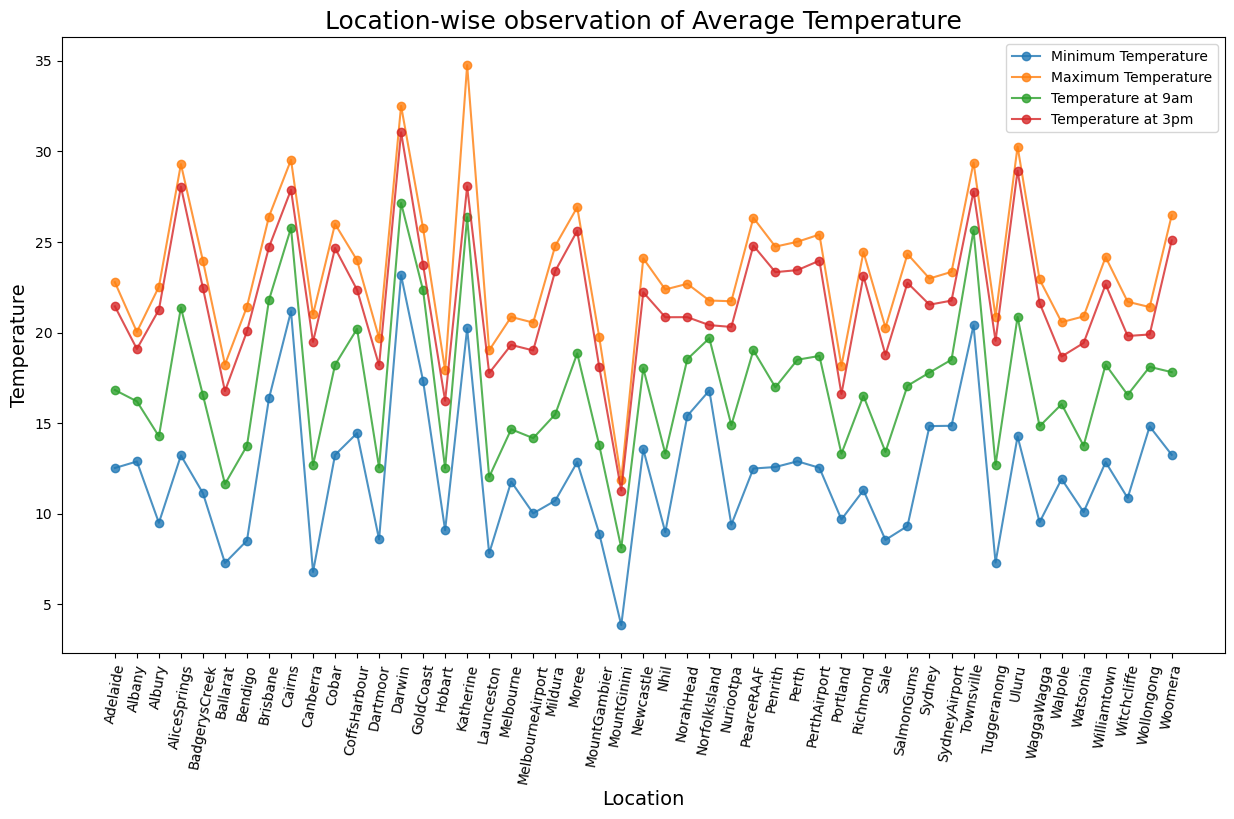

In [119]:
x = location_weather_df.loc[:, 'Location']
y1 = location_weather_df['MinTemp'] 
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am'] 
y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8) 
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8) 
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8)

plt.xlabel('Location', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Location-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

## Predictive Analysis

### Feature Extraction

In [121]:
num_weather_df = updated_weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]
num_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,16.9,21.8,0,0
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,17.2,24.3,0,0
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,20.6,28.9,0,0
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,16.3,25.5,0,0


In [123]:
column_names = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
one_original_hot = pd.get_dummies(updated_weather_df[column_names])
one_original_hot.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [125]:
final_df = pd.concat([num_weather_df, one_original_hot], axis=1)
final_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.46132,7.61509,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,5.46132,7.61509,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,17.5,32.3,1.0,5.46132,7.61509,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False
3,14.6,29.7,0.2,5.46132,7.61509,56.0,19.0,24.0,55.0,23.0,...,False,False,False,False,False,False,False,True,False,False
4,7.7,26.7,0.0,5.46132,7.61509,35.0,6.0,17.0,48.0,19.0,...,False,False,False,False,False,False,False,True,False,False


### Feature Selection

### Correlation of Weather Feature

In [127]:
weather_corr = final_df.corr()
weather_corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
MinTemp,1.000000,0.734449,0.103347,0.358375,0.053518,0.174879,0.177037,0.172645,-0.235020,0.004329,...,-0.070841,-0.063972,-0.011599,0.056401,0.023793,-0.035708,-0.046090,-0.078744,-0.046073,-0.059135
MaxTemp,0.734449,1.000000,-0.073583,0.447584,0.331618,0.069864,0.017958,0.050423,-0.501493,-0.500325,...,-0.009106,-0.007303,-0.057861,0.006588,-0.012940,-0.062098,-0.055131,-0.070555,-0.026208,-0.059769
Rainfall,0.103347,-0.073583,1.000000,-0.039140,-0.171406,0.127677,0.087206,0.060072,0.219696,0.248604,...,-0.019310,-0.005525,0.019872,0.010470,0.013388,0.025189,0.011413,0.016227,0.009919,0.012508
Evaporation,0.358375,0.447584,-0.039140,1.000000,0.292557,0.150608,0.143145,0.093413,-0.380420,-0.291679,...,-0.029717,-0.018793,-0.010011,0.013631,0.017389,-0.007608,0.001833,-0.025697,-0.024420,-0.009999
Sunshine,0.053518,0.331618,-0.171406,0.292557,1.000000,-0.019216,0.008317,0.039623,-0.350935,-0.446119,...,-0.019054,-0.009157,-0.029154,0.000825,-0.012564,-0.017939,0.020497,-0.014561,-0.010444,0.008384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WindDir3pm_SSW,-0.035708,-0.062098,0.025189,-0.007608,-0.017939,-0.006217,0.010992,-0.009039,0.027116,0.027926,...,-0.058569,-0.061256,-0.065211,-0.081693,-0.063798,1.000000,-0.064144,-0.066484,-0.062056,-0.065143
WindDir3pm_SW,-0.046090,-0.055131,0.011413,0.001833,0.020497,0.007115,-0.003023,0.006444,-0.004957,-0.007709,...,-0.063293,-0.066197,-0.070471,-0.088281,-0.068943,-0.064144,1.000000,-0.071846,-0.067061,-0.070397
WindDir3pm_W,-0.078744,-0.070555,0.016227,-0.025697,-0.014561,0.087990,0.027363,0.059178,0.002357,-0.018787,...,-0.065601,-0.068611,-0.073041,-0.091501,-0.071458,-0.066484,-0.071846,1.000000,-0.069507,-0.072965
WindDir3pm_WNW,-0.046073,-0.026208,0.009919,-0.024420,-0.010444,0.084901,0.014906,0.056502,-0.002095,-0.034151,...,-0.061232,-0.064042,-0.068176,-0.085407,-0.066699,-0.062056,-0.067061,-0.069507,1.000000,-0.068105


In [129]:
cor_target = abs(weather_corr["RainTomorrow"])

relevant_train_features = cor_target[cor_target>0.20]
relevant_train_features

Rainfall         0.236476
Sunshine         0.326659
WindGustSpeed    0.225439
Humidity9am      0.254008
Humidity3pm      0.438649
Pressure9am      0.235220
Pressure3pm      0.215813
Cloud9am         0.252877
Cloud3pm         0.297873
RainToday        0.309025
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [131]:
final_weather_train_data = final_df[['Rainfall', 'Sunshine', 'WindGustSpeed',
                                     'Humidity9am', 'Humidity3pm', 'Pressure9am',
                                     'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'RainToday', 'RainTomorrow']]
final_weather_train_data.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,7.61509,44.0,71.0,22.0,1007.7,1007.1,8.000000,4.519122,0,0
1,0.0,7.61509,44.0,44.0,25.0,1010.6,1007.8,4.447985,4.519122,0,0
2,1.0,7.61509,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,0,0
3,0.2,7.61509,56.0,55.0,23.0,1009.2,1005.4,4.447985,4.519122,0,0
4,0.0,7.61509,35.0,48.0,19.0,1013.4,1010.1,4.447985,4.519122,0,0


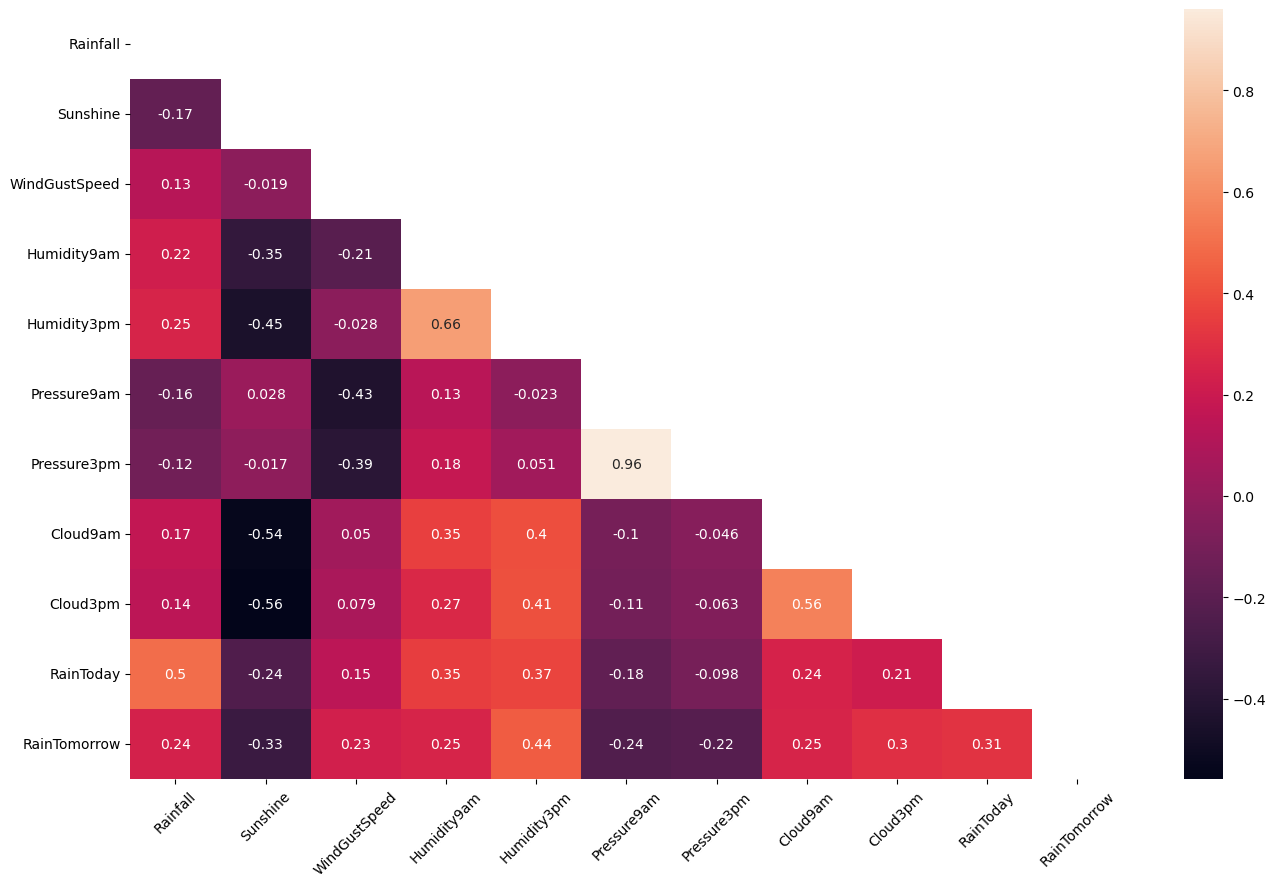

In [133]:
final_train_corr = final_weather_train_data.corr()
mask = np.triu(np.ones_like(final_train_corr, dtype=bool))
plt.figure(figsize=(16,10))
sns.heatmap(final_train_corr,annot=True, mask = mask)
plt.xticks(rotation=45)
plt.show()

## Train-Test-Val Split

The weather data has been divided into X and y sets based on the feature variables and the target variable. The X set contains all the independent variables whereas the y set contains the dependent variable RainTomorrow. The X and y sets have been divided into 80:20 ratio i.e. 80% of data can be used for training purpose and 20% of data can be used for testing purpose. The unknown data has been considered as the validation set which will be used for validating the trained classifiers.

In [135]:
X = final_weather_train_data.drop(['RainTomorrow'], axis=1)
y = final_weather_train_data['RainTomorrow']

In [137]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(79612, 10) (19904, 10) (79612,) (19904,)


## Classification Models

### Logistic Regression Model

In [139]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [141]:
log_reg_model.predict(X_val)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 84.0%


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

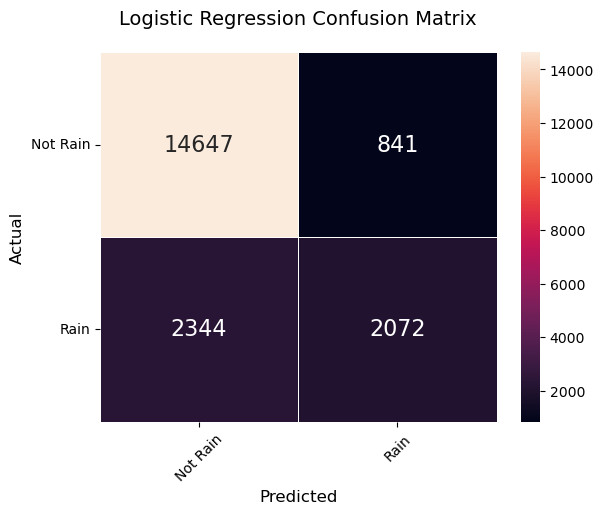

In [145]:
y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

In [147]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.95      0.90     15488
        Rain       0.71      0.47      0.57      4416

    accuracy                           0.84     19904
   macro avg       0.79      0.71      0.73     19904
weighted avg       0.83      0.84      0.83     19904



## KNN Classification Model

In [149]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [151]:
knn_model.predict(X_val)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [153]:
knn_model_score = knn_model.score(X_val, y_val)
knn_model_accuracy = round(knn_model_score*100, 2)
print("The classification accuracy of KNN model is "+ str(knn_model_accuracy)+"%")

The classification accuracy of KNN model is 82.98%


Text(0.5, 1.0, 'KNN Confusion Matrix')

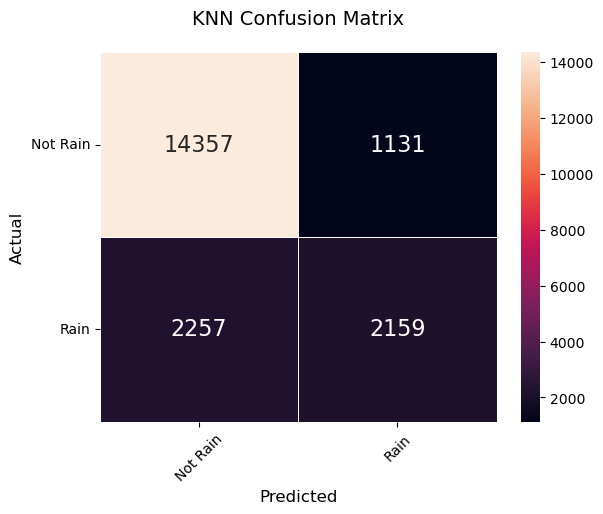

In [155]:
y_pred = knn_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('KNN Confusion Matrix', fontsize=14, pad=20)

In [157]:
print('KNN Classification Report')
print('=========================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

KNN Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.93      0.89     15488
        Rain       0.66      0.49      0.56      4416

    accuracy                           0.83     19904
   macro avg       0.76      0.71      0.73     19904
weighted avg       0.82      0.83      0.82     19904



## Decision Tree Classification Model

In [159]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [161]:
dtree_model.predict(X_val)

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [163]:
dtree_model_score = dtree_model.score(X_val, y_val)
dtree_model_accuracy = round(dtree_model_score*100, 2)
print("The classification accuracy of Decision Tree model is "+ str(dtree_model_accuracy)+"%")

The classification accuracy of Decision Tree model is 77.37%


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

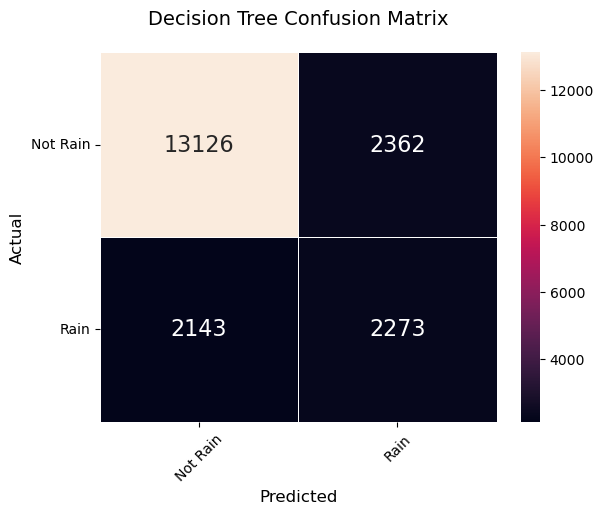

In [165]:
y_pred = dtree_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Decision Tree Confusion Matrix', fontsize=14, pad=20)

In [167]:
print('Decision Tree Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Decision Tree Classification Report

              precision    recall  f1-score   support

    Not Rain       0.86      0.85      0.85     15488
        Rain       0.49      0.51      0.50      4416

    accuracy                           0.77     19904
   macro avg       0.68      0.68      0.68     19904
weighted avg       0.78      0.77      0.78     19904



## Random Forest Classification Model

In [169]:
rforest_model = RandomForestClassifier()
rforest_model.fit(X_train, y_train)

RandomForestClassifier()

In [171]:
rforest_model.predict(X_val)

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [173]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 84.66%


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

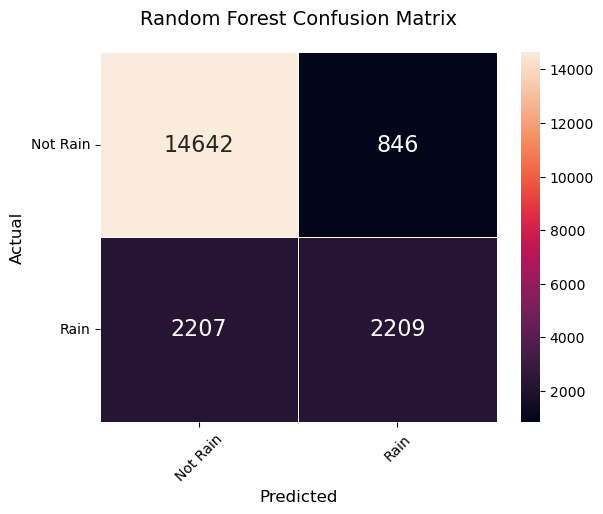

In [175]:
y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Predicted', fontsize=12)
axes.set_ylabel('Actual', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [177]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.87      0.95      0.91     15488
        Rain       0.72      0.50      0.59      4416

    accuracy                           0.85     19904
   macro avg       0.80      0.72      0.75     19904
weighted avg       0.84      0.85      0.84     19904



### Classification Model Performance Analysis

In [179]:
accuracy_dict = {'Logistic Regrssion' : log_reg_model_accuracy,
                 'K-Nearest Neighbors' : knn_model_accuracy,
                 'Decision Tree' : dtree_model_accuracy,
                 'Random Forest' : rforest_model_accuracy}
                 
                 
print("Classification Accuracy of All Models")
print('=====================================')
print()
for k, v in accuracy_dict.items():
    print(k,"=",v,"%")

Classification Accuracy of All Models

Logistic Regrssion = 84.0 %
K-Nearest Neighbors = 82.98 %
Decision Tree = 77.37 %
Random Forest = 84.66 %


### Model Training

In [181]:
# Normalizing the features for stable and fast training.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [183]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

models = [XGBClassifier(),
          SVC(kernel='rbf',
              probability=True)]

for i in range(2):
    models[i].fit(X, y)
    print(f'{models[i]} : ')
    train_preds = models[i].predict_proba(X)
    print('Training Accuracy : ',
      metrics.roc_auc_score(y, train_preds[:,1]))
    val_preds = models[i].predict_proba(X_val)
    print(f'Validation on Accuracy : ,{
      metrics.roc_auc_score(y_val, val_preds[:,1])} \n \n')



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9115025769450967
Validation on Accuracy : ,0.9114042723702875 
 

SVC(probability=True) : 
Training Accuracy :  0.8237649474993372
Validation on Accuracy : ,0.8230411786778355 
 



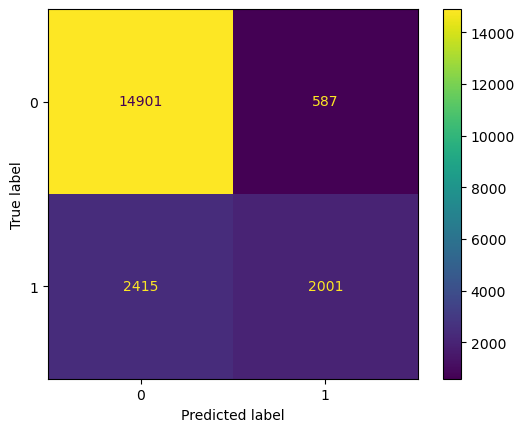

In [185]:
# Model Evaluation

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

ConfusionMatrixDisplay.from_estimator(models[1], X_val, y_val)

plt.show()

In [187]:
# Classification Report

print(metrics.classification_report(y_val,
      models[1].predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     15488
           1       0.77      0.45      0.57      4416

    accuracy                           0.85     19904
   macro avg       0.82      0.71      0.74     19904
weighted avg       0.84      0.85      0.83     19904



### Improving Random Forest Classifier

#### Hyperparameter Optimization of Random Forest Classifier

In [189]:
param_grid = {
    'n_estimators': [50, 100, 200],                # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],                # Maximum depth of each tree
    'criterion': ['gini', 'entropy'],              # The function to measure the quality of a split
    'bootstrap': [True, False],                     # Whether bootstrap samples are used when building trees
    'random_state': [10, 20],                       # Random state for reproducibility
    'max_features': ['sqrt', 'log2'],               # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                   # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=rforest_model, param_grid=param_grid,
                           cv=3, verbose=1, n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train, y_train)
    

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'random_state': [10, 20]},
             scoring='accuracy', verbose=1)

In [191]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 20}


In [193]:
y_pred = best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val,y_pred))
print(classification_report(y_val,y_pred))

Accuracy: 0.7781350482315113
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15488
           1       0.00      0.00      0.00      4416

    accuracy                           0.78     19904
   macro avg       0.39      0.50      0.44     19904
weighted avg       0.61      0.78      0.68     19904



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

### Random Forest Classifier with Optimized Hyperparameters

In [195]:
rforest_model = RandomForestClassifier(**best_params)
rforest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=20)

In [197]:
rforest_model.predict(X_val)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [199]:
rforest_model_score = rforest_model.score(X_val, y_val)
rforest_model_accuracy = round(rforest_model_score*100, 2)
print("The classification accuracy of Random Forest model is "+ str(rforest_model_accuracy)+"%")

The classification accuracy of Random Forest model is 77.81%


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

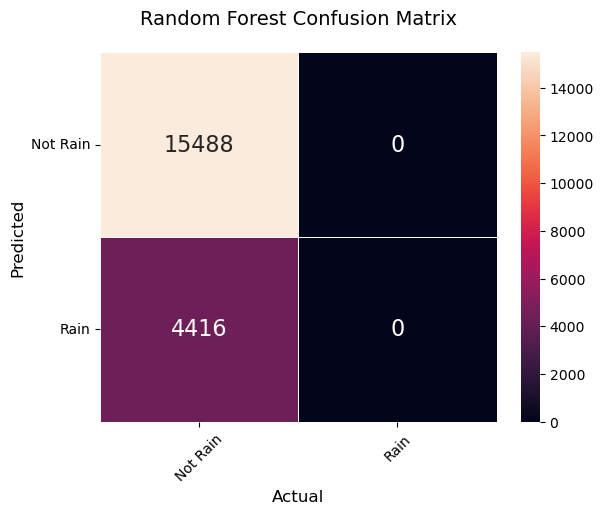

In [201]:
y_pred = rforest_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Rain', 'Rain']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Random Forest Confusion Matrix', fontsize=14, pad=20)

In [203]:
print('Random Forest Classification Report')
print('===================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Random Forest Classification Report

              precision    recall  f1-score   support

    Not Rain       0.78      1.00      0.88     15488
        Rain       0.00      0.00      0.00      4416

    accuracy                           0.78     19904
   macro avg       0.39      0.50      0.44     19904
weighted avg       0.61      0.78      0.68     19904



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
